In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
tweets = pd.read_csv("tweets.csv")

In [3]:
users = pd.read_csv("users.csv" , on_bad_lines = "skip")

C:\Users\Rayan\AppData\Local\Temp\ipykernel_4700\2933307580.py:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv("users.csv" , on_bad_lines = "skip")


In [4]:
entities = pd.read_csv("entities.csv")

In [5]:
companies = pd.read_csv("companies.csv")

In [6]:
tweets.tail(5)

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
9091534,907725480618610689,Contrasting Pure Cycle Corporation $PCYO &amp;...,2920258887,0,0,0,0,pt,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:53 +0000 2017
9091535,907725484909309957,Contrasting Harvard Bioscience $HBIO &amp; Ful...,2920258887,0,0,0,0,da,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:54 +0000 2017
9091536,907725487996272640,"NRG Energy, Inc. $NRG Receives $21.13 Average ...",2920258887,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:55 +0000 2017
9091537,907725490760376320,Reviewing Arch Therapeutics $ARTH and Globus M...,2920258887,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Sep 12 21:59:56 +0000 2017
9091538,907725492874223616,$JD Beginning stage of a breakout. Strong buy ...,840771557601423360,0,0,0,0,en,"<a href=""http://www.twitter.com"" rel=""nofollow...",Tue Sep 12 21:59:56 +0000 2017


In [7]:
companies.head()

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09


In [8]:
entities.head()

,tweet_id,entity_type,text
0,865191269030612992,url,http://ih.advfn.com/p.php?pid=nmona&article=74...
1,865191269030612992,symbol,AMGN
2,865191271899570176,url,https://finance.yahoo.com/news/amgen-submits-b...
3,865191271899570176,hashtag,FDA
4,865191271899570176,hashtag,biotech


In [9]:
companies['exchange'].value_counts()

OTCMKTS     22956
NASDAQ       3013
NYSE         2997
NYSEARCA      726
NYSEMKT       340
Name: exchange, dtype: int64

In [10]:
entities['entity_type'].value_counts()

symbol          19451737
url              7234124
hashtag          5840863
mention          3169329
image             707843
animated_gif       55172
video              23393
Name: entity_type, dtype: int64

In [11]:
for i in range(10) : 
        print(entities.loc[i])

tweet_id                                      865191269030612992
entity_type                                                  url
text           http://ih.advfn.com/p.php?pid=nmona&article=74...
Name: 0, dtype: object
tweet_id       865191269030612992
entity_type                symbol
text                         AMGN
Name: 1, dtype: object
tweet_id                                      865191271899570176
entity_type                                                  url
text           https://finance.yahoo.com/news/amgen-submits-b...
Name: 2, dtype: object
tweet_id       865191271899570176
entity_type               hashtag
text                          FDA
Name: 3, dtype: object
tweet_id       865191271899570176
entity_type               hashtag
text                      biotech
Name: 4, dtype: object
tweet_id       865191271899570176
entity_type               hashtag
text                     erenumab
Name: 5, dtype: object
tweet_id       865191271899570176
entity_type               hash

In [14]:
companies.head(10)

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06
3,AAAIF,ALTERNATIVE INV TR N,OTCMKTS,7.840000e+06
4,AAALF,AAREAL BANK AG NPV,OTCMKTS,1.720000e+09
5,AAALY,Aareal Bank AG,OTCMKTS,2.040000e+09
6,AAAP,Advanced Accelerator,NASDAQ,1.710000e+09
7,AAARF,ALUAR ALUMINIO ARG C,OTCMKTS,2.460000e+09
8,AAAUF,"AUPLATA, CAYENNE",OTCMKTS,4.137000e+07
9,AABA,Altaba Inc,NASDAQ,4.974000e+10


In [15]:
users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,verified,description,created_at,bot
0,859451814940336128,Nao,sovereignao,2460,181,399,5247,6,NaN,en,Pacific Time (US & Canada),HODLing fast on,NaN,Self-sovereign,Tue May 02 16:57:35 +0000 2017,NaN
1,44060322,Benzinga.com,Benzinga,126228,59237,1617,2774,2310,http://www.benzinga.com/,en,Eastern Time (US & Canada),Zingernation,1.0,Financial news site. Creator of Benzinga Pro: ...,Tue Jun 02 04:43:10 +0000 2009,NaN
2,713570637306986496,Best Investings,bestinvestings,2718,27,0,0,3,NaN,en,Pacific Time (US & Canada),IN THE CHARTS,NaN,May or may not give you the best investing adv...,Sat Mar 26 03:37:52 +0000 2016,NaN
3,823239593151655936,thestocklist,thestocklist,447,25,9,3,2,http://thestocklist.com,en,Eastern Time (US & Canada),U.S.A.,NaN,Check out my new website http://thestocklist.c...,Sun Jan 22 18:43:08 +0000 2017,NaN
4,44367489,MM&M Magazine,MMMnews,11078,9277,548,90,783,http://www.mmm-online.com,en,Quito,"New York, NY, USA",NaN,"MM&M: the most objective, relevant, and timely...",Wed Jun 03 14:20:16 +0000 2009,NaN


In [17]:
def get_month(x) : 
    y = x.split(" ")
    month = y[1]
    months = {'Jan':1 , 'Feb':2 , 'Mar':3 , 'Apr':4 , 'May':5 , 'Jun':6 , 'Jul':7 , 'Aug':8 , 'Sep':9 , 'Oct':10 , 
              'Nov':11 , 'Dec':12 }
    return months[month]

def get_week_day(x):
    week_day = x.split(" ")[0]
    days = {'Sat':1 , 'Sun':2 , 'Mon':3 , 'Tue':4 , 'Wed':5 , 'Thu':6 , 'Fri':7}
    return days[week_day]


def get_year(x) : 
    y = x.split(" ")
    year = int(y[-1])
    return year

def get_day(x): 
    y = x.split(" ")
    day = int(y[2])
    return day

def get_hour(x) : 
    y = x.split(" ")
    hour = int(y[3].split(":")[0])
    return hour
#Thu May 18 22:00:14 +0000 2017
tweets['year' ] = tweets['created_at'].apply(get_year)
tweets['month'] = tweets['created_at'].apply(get_month)
tweets['day'] = tweets['created_at'].apply(get_day)
tweets['hour'] = tweets['created_at'].apply(get_hour)
tweets['week_day'] = tweets['created_at'].apply(get_week_day)

In [18]:
msk_img = entities['entity_type'] == 'image'
msk_gif = entities['entity_type'] == 'animated_gif'
msk_url = entities['entity_type'] == 'url'
msk_mention = entities['entity_type'] == 'mention'
msk_video = entities['entity_type'] == 'video'
msk_ent = msk_img | msk_gif | msk_url | msk_mention | msk_video 

In [19]:
entity_1 = entities[~msk_ent].reset_index()
entity_1

,index,tweet_id,entity_type,text
0,1,865191269030612992,symbol,AMGN
1,3,865191271899570176,hashtag,FDA
2,4,865191271899570176,hashtag,biotech
3,5,865191271899570176,hashtag,erenumab
4,6,865191271899570176,hashtag,migraines
...,...,...,...,...
25292595,36482455,908044454728146944,symbol,TRIG
25292596,36482456,908044454728146944,symbol,VRC
25292597,36482457,908044454728146944,symbol,XEL
25292598,36482458,908044454728146944,symbol,XVC


In [20]:
entity_1 = entity_1.drop(['index'] , axis = 1 )

In [21]:
entity_1.head

<bound method NDFrame.head of                     tweet_id entity_type       text
0         865191269030612992      symbol       AMGN
1         865191271899570176     hashtag        FDA
2         865191271899570176     hashtag    biotech
3         865191271899570176     hashtag   erenumab
4         865191271899570176     hashtag  migraines
...                      ...         ...        ...
25292595  908044454728146944      symbol       TRIG
25292596  908044454728146944      symbol        VRC
25292597  908044454728146944      symbol        XEL
25292598  908044454728146944      symbol        XVC
25292599  908045452720918530      symbol        XOM

[25292600 rows x 3 columns]>

In [22]:
entity_keys = dict(entity_1['text'].value_counts())

In [23]:
tweeted_copmanies = {}

for i in companies.index : 
    comp = companies.loc[i]['name']
    tick = companies.loc[i]['ticker']
    tweeted_copmanies[comp] = entity_keys.get(comp, 0 ) + entity_keys.get(tick , 0 )

In [24]:
tweeted_copmanies = dict(sorted(tweeted_copmanies.items() , key=lambda x:x[1] , reverse=True))

In [25]:
comps = list(tweeted_copmanies.keys())
counts = list(tweeted_copmanies.values())

In [26]:
tweeted_copmanies = pd.DataFrame({'company' : comps , 'count' : counts})
tweeted_copmanies.head()

,company,count
0,Apple Inc.,292631
1,"Amazon.com, Inc.",241710
2,Facebook Inc,212040
3,Tesla Inc,184992
4,SPDR S&P 500 ETF Tru,160688


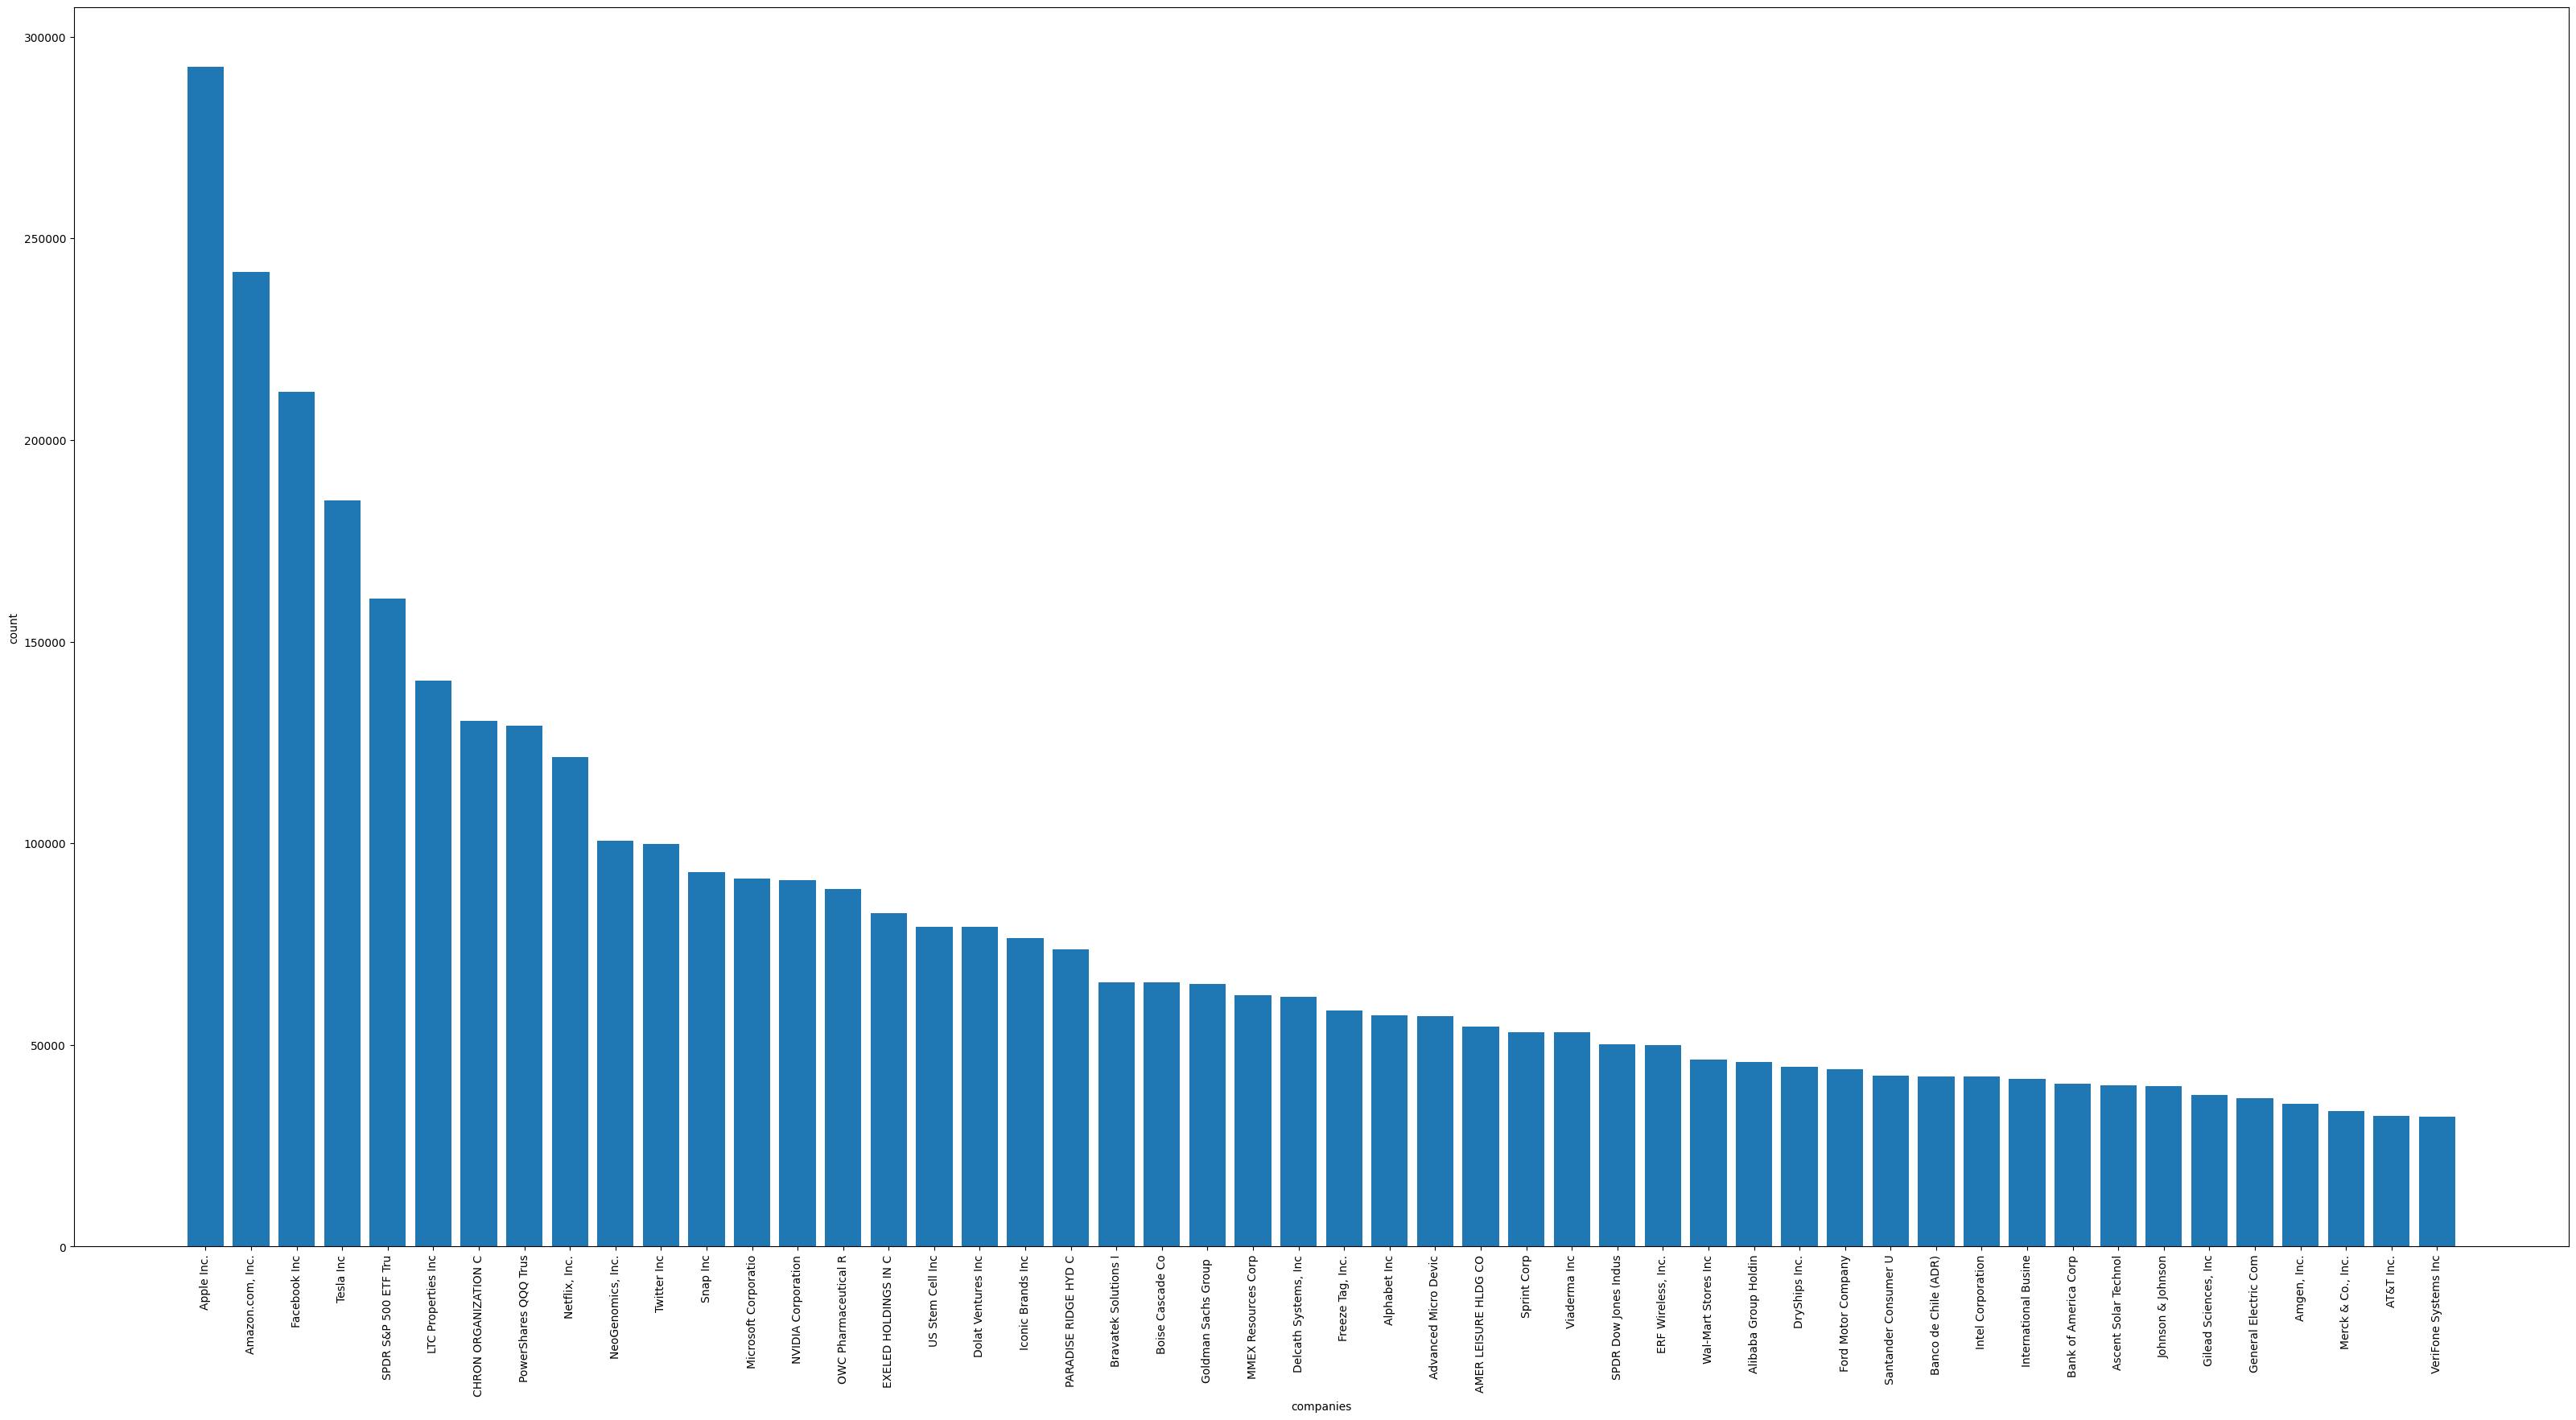

In [27]:
ax_1 , fig_1 = plt.subplots(figsize = (40,20))
plt.bar(comps[:50] , counts[:50])
plt.xticks(rotation = 'vertical')
plt.ylabel("count")
plt.xlabel("companies")
plt.show()

In [28]:
comp_cash = tweeted_copmanies['count'].value_counts()

In [29]:
certain_cash =  list(comp_cash.keys())
number_of_comp = list(comp_cash.values)
comp_certain_cashtags = pd.DataFrame({'count' : certain_cash , 'Number Of Companies' : number_of_comp})
comp_certain_cashtags

,count,Number Of Companies
0,0,11947
1,1,1344
2,3,1291
3,4,1217
4,2,1044
...,...,...
2819,2832,1
2820,1157,1
2821,1158,1
2822,2831,1


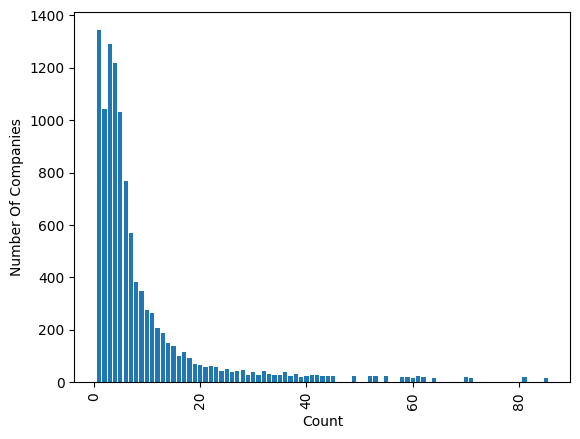

In [30]:
plt.bar(certain_cash[1:60] , number_of_comp[1:60])
plt.xticks(rotation = 'vertical')
plt.ylabel("Number Of Companies")
plt.xlabel("Count")
plt.show()

In [31]:
market_cap = []
exchange = []
for i in comps : 
    market_cap.append(companies[companies['name'] == i ]['capitalization'].values[0])
    exchange.append(companies[companies['name'] == i ]['exchange'].values[0])

In [32]:
full_entity_1 = pd.DataFrame({'company' : comps , 'count' : counts , 'exchange': exchange , 'market_cap' : market_cap })
full_entity_1

,company,count,exchange,market_cap
0,Apple Inc.,292631,NASDAQ,7.485500e+11
1,"Amazon.com, Inc.",241710,NASDAQ,4.574300e+11
2,Facebook Inc,212040,NASDAQ,4.413200e+11
3,Tesla Inc,184992,NASDAQ,5.394000e+10
4,SPDR S&P 500 ETF Tru,160688,NYSEARCA,2.341300e+11
...,...,...,...,...
28768,ATEL CAP EQUIP FD IX,0,OTCMKTS,NaN
28769,NATIONAL TAX CREDIT,0,OTCMKTS,NaN
28770,CNL INCOME & GROWTH,0,OTCMKTS,NaN
28771,JONES UNITED KINGDOM,0,OTCMKTS,NaN


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
full_entity_1['exchange'] = le.fit_transform(full_entity_1['exchange'])
full_entity_1

,company,count,exchange,market_cap
0,Apple Inc.,292631,0,7.485500e+11
1,"Amazon.com, Inc.",241710,0,4.574300e+11
2,Facebook Inc,212040,0,4.413200e+11
3,Tesla Inc,184992,0,5.394000e+10
4,SPDR S&P 500 ETF Tru,160688,2,2.341300e+11
...,...,...,...,...
28768,ATEL CAP EQUIP FD IX,0,4,NaN
28769,NATIONAL TAX CREDIT,0,4,NaN
28770,CNL INCOME & GROWTH,0,4,NaN
28771,JONES UNITED KINGDOM,0,4,NaN


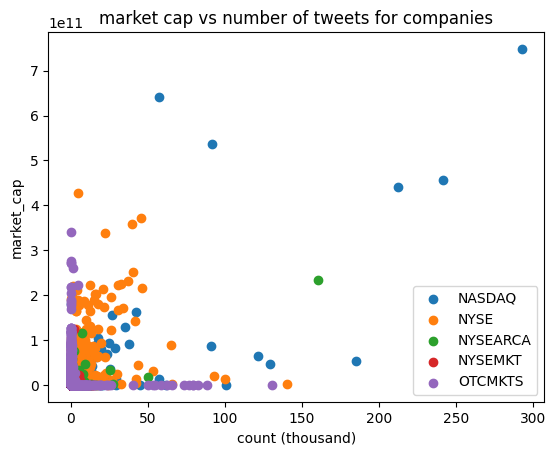

In [53]:
for i in range(len(le.classes_)) : 
    plt.scatter(full_entity_1[full_entity_1['exchange'] == i].dropna(subset=['market_cap'])['count']/1000 ,
                full_entity_1[full_entity_1['exchange'] == i].dropna(subset=['market_cap'])['market_cap'] , 
                 label = le.classes_[i] )

plt.xlabel("count (thousand)")
plt.ylabel("market_cap")
plt.title("market cap vs number of tweets for companies")
plt.legend()
plt.show()

# Q2

In [55]:
tweeted_copmanies.head(10)

,company,count
0,Apple Inc.,292631
1,"Amazon.com, Inc.",241710
2,Facebook Inc,212040
3,Tesla Inc,184992
4,SPDR S&P 500 ETF Tru,160688
5,LTC Properties Inc,140447
6,CHRON ORGANIZATION C,130409
7,PowerShares QQQ Trus,129154
8,"Netflix, Inc.",121325
9,"NeoGenomics, Inc.",100670


In [70]:
tweets = tweets.rename(columns={"id" : "tweet_id"})

In [173]:
def get_date(x) : 
    res = []
    for i in x : 
        res.append(f"{i[0]}/{i[1]}/{i[2]}")
    return res
stocks_5 = ['Apple Inc.' , 'Amazon.com, Inc.' , 'Facebook Inc' , 'Tesla Inc' , 'Netflix, Inc.']
keys_keys = []
groups_gr = []
for i in range(len(stocks_5)) : 
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc]['ticker'].values[0]
    msk_5 = (entities['text'] == cc ) | (entities['text'] == tt )
    tweet_5 = pd.merge(entities[msk_5] , tweets , on='tweet_id' , how = 'inner' )
    groups = tweet_5.groupby(by=['year' , 'month' , 'day']).count()['tweet_id']
    key_gr = list(groups.keys())
    key_gr = get_date(key_gr)
    val_gr = groups.values
    keys_keys.append(key_gr)
    groups_gr.append(val_gr)

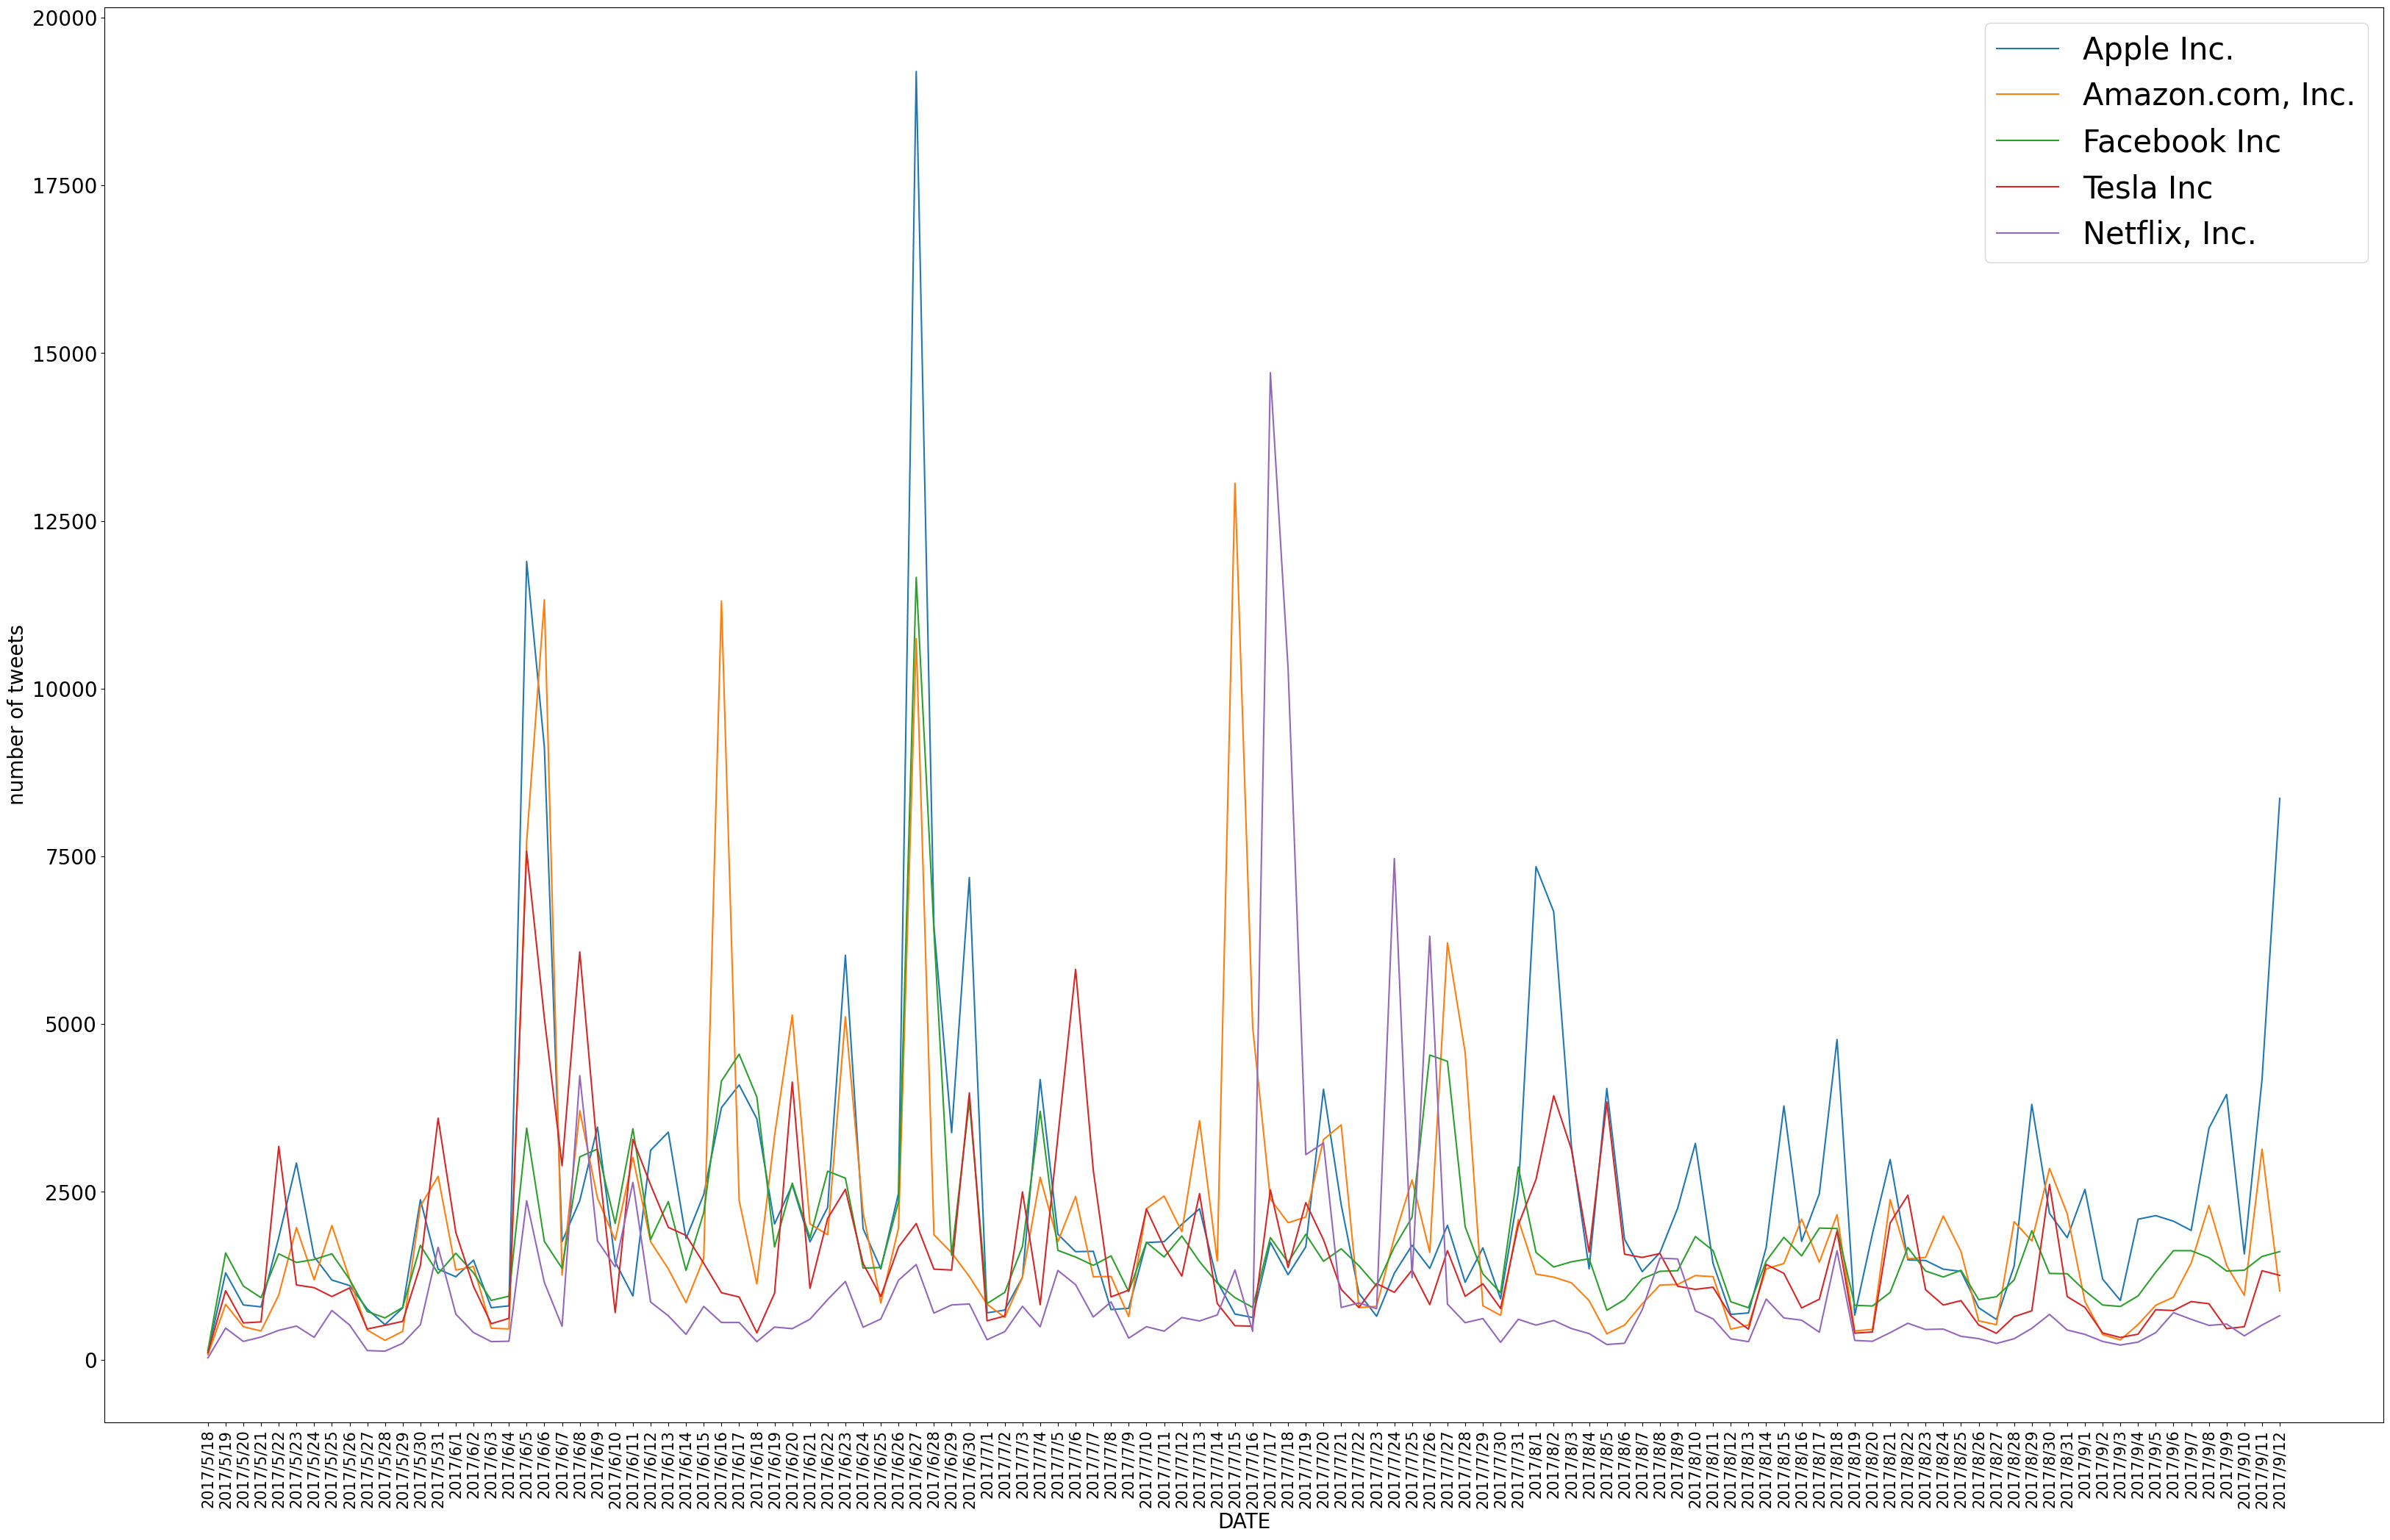

In [174]:
ax_2 , fig_2 = plt.subplots(figsize = (40,25))
for i in range(len(stocks_5)) : 
    plt.plot(keys_keys[i] , groups_gr[i] , label = stocks_5[i])
plt.xticks(keys_keys[0] , rotation = 'vertical' , fontsize = 15)
plt.xlabel("DATE" , fontsize = 20)
plt.ylabel("number of tweets" , fontsize = 20)
plt.yticks(fontsize = 20 )
plt.legend(fontsize = 30)
plt.show()

In [176]:
def get_7_day_moving_average(x) : 
    n = len(x)
    res = []
    for i in range(3,n-4) : 
        res.append(sum(x[i-3:i+4]))
    return res

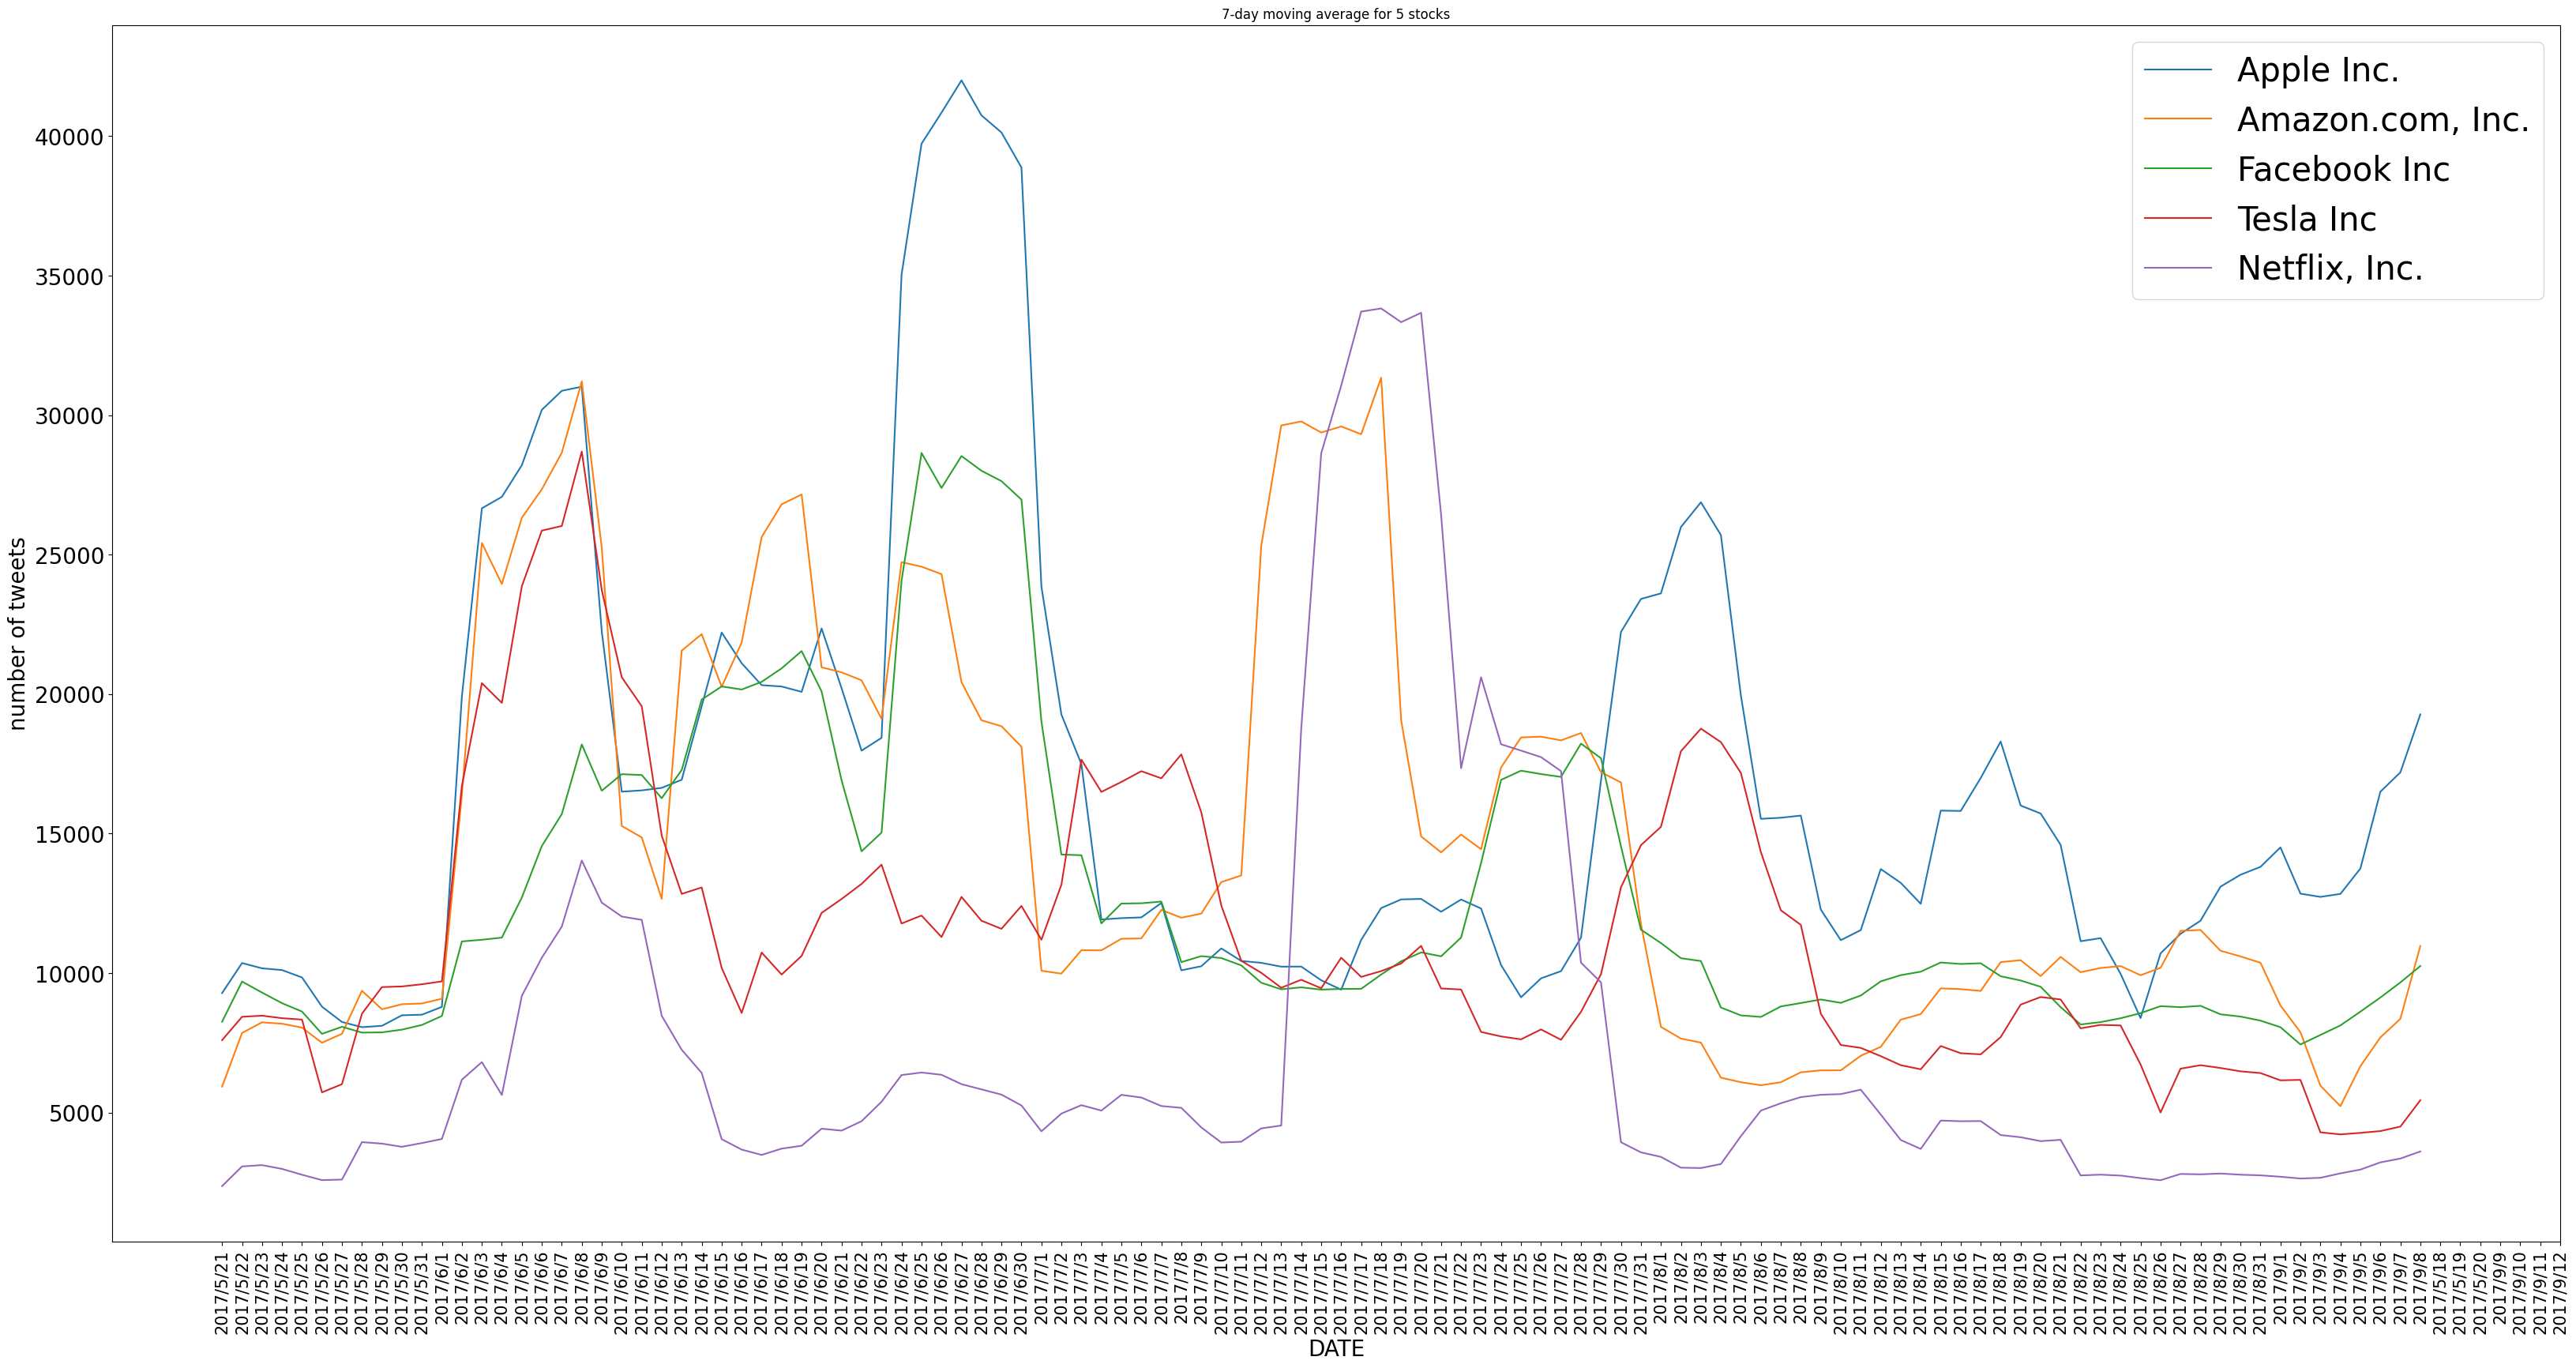

In [179]:
ax_3 , fig_3 = plt.subplots(figsize = (40,20))
for i in range(len(stocks_5)) : 
    moving = get_7_day_moving_average(groups_gr[i])
    plt.plot(keys_keys[0][3:-4] , moving , label = stocks_5[i])
plt.xticks(keys_keys[0] , rotation = 'vertical' , fontsize = 15)
plt.xlabel("DATE" , fontsize = 20)
plt.ylabel("number of tweets" , fontsize = 20)
plt.yticks(fontsize = 20 )
plt.legend(fontsize = 30)
plt.title("7-day moving average for 5 stocks")
plt.show()

In [ ]:
# Amazon : 
# در ماه ششم ، زمان ارائه عملکرد سه ماهه بوده 
# در ماه هفتم ، پیک بابت هفته 
# MADE_IN_AMERCA_WEEK

# Netflix : 
# در ماه ششم ، زمان ارائه عملکرد سه ماهه بوده
# در هفته دوم ماه هفتم ، زمان کامیک کان بوده + آغاز سریال 
# game of thrones

# apple : 
# در ماه هشتم ، بابت ارائه عملکرد سه ماهه ، پیک توییت ها را داشته ایم
# در ماه ششم ، تولد ده سالگی آیفون را داشته ایم و به همین خاطر ، پیک توییت ها را داشته ایم

# facebook : 
# در ماه ششم ، بابت ارائه عملکرد سه ماهه ، پیک توییت ها را داشته ایم
# در اواخر ماه ششم ، خبر آمده که کاربران فیس بوک از دو میلیارد نفر عبور کردند 

# tesla : 
# در ماه ششم ، بابت ارائه عملکرد سه ماهه ، پیک توییت ها را داشته ایم
# در ماه هشتم ، بابت ارائه عملکرد سه ماهه ، پیگ توییت ها را داشته ایم

In [181]:
all_tweets = tweets.groupby(by=['year' , 'month' , 'day']).count()['tweet_id']
gr_all = list(all_tweets.values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


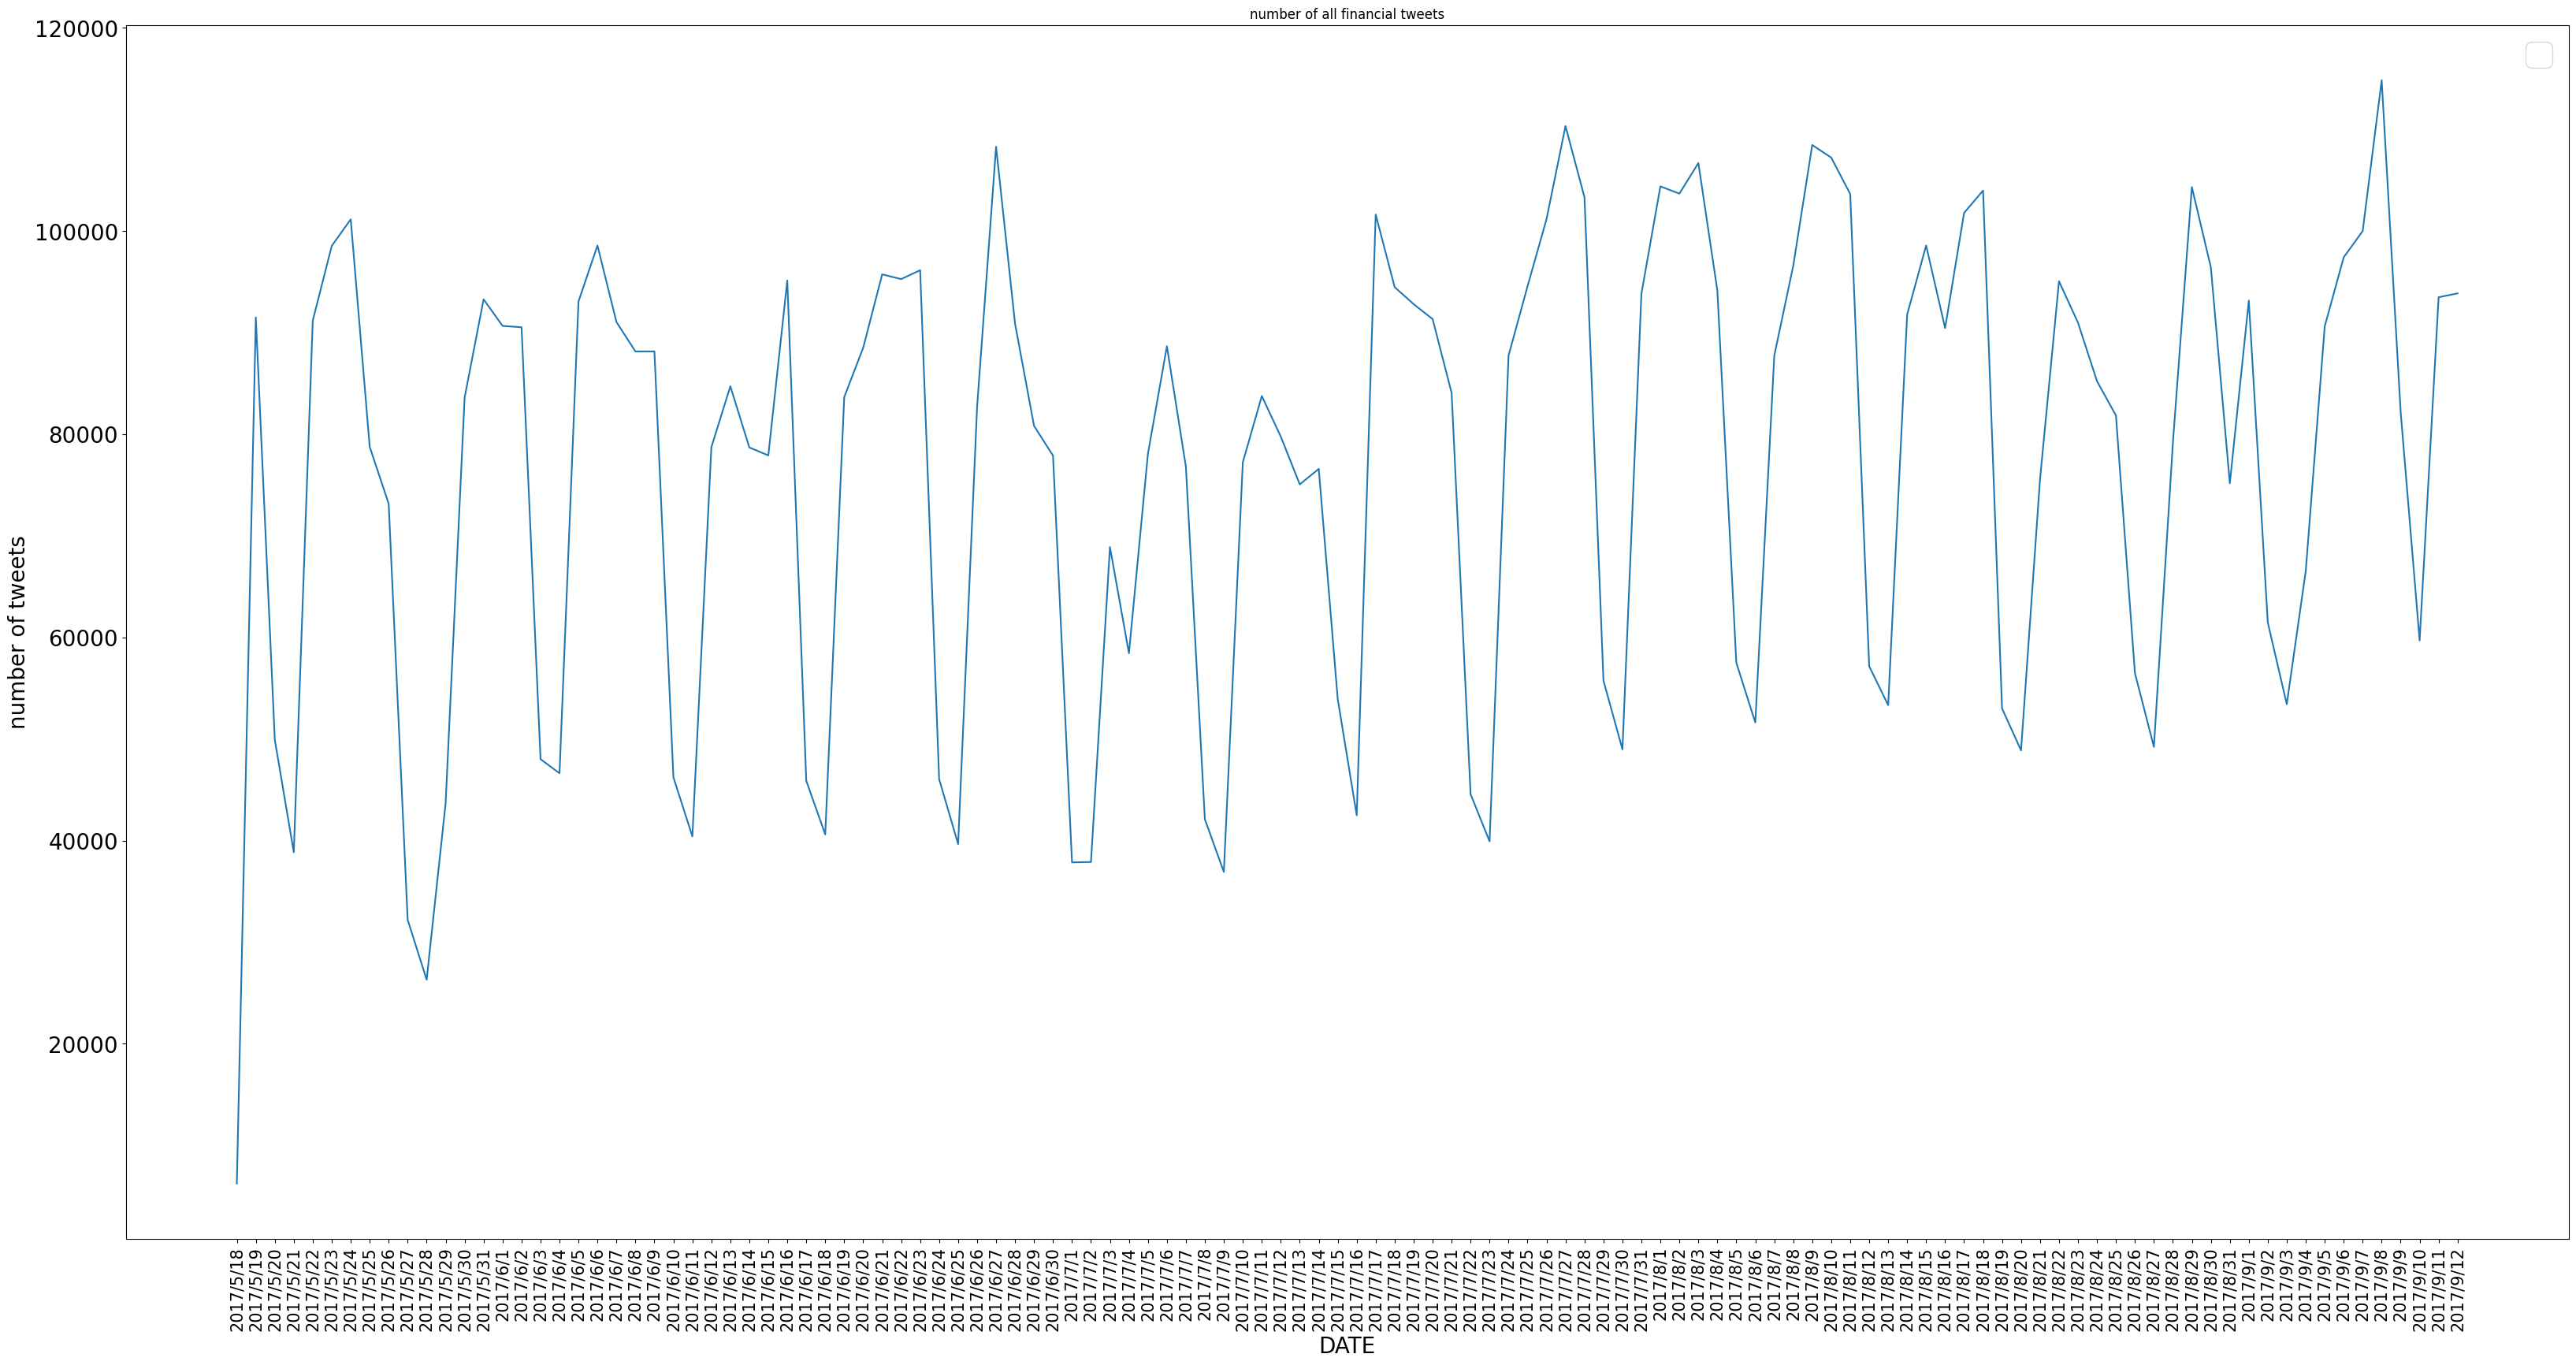

In [183]:
fig_4 , ax_4 = plt.subplots(figsize = (40,20))
plt.plot(keys_keys[0] , gr_all )
plt.xticks(keys_keys[0] , rotation = 'vertical' , fontsize = 15)
plt.xlabel("DATE" , fontsize = 20)
plt.ylabel("number of tweets" , fontsize = 20)
plt.yticks(fontsize = 20 )
plt.legend(fontsize = 30)
plt.title("number of all financial tweets")
plt.show()

In [188]:
all_hour = list(tweets.groupby(by=['hour']).count()['tweet_id'].values)
hours = list(tweets.groupby(by=['hour']).count()['tweet_id'].keys())

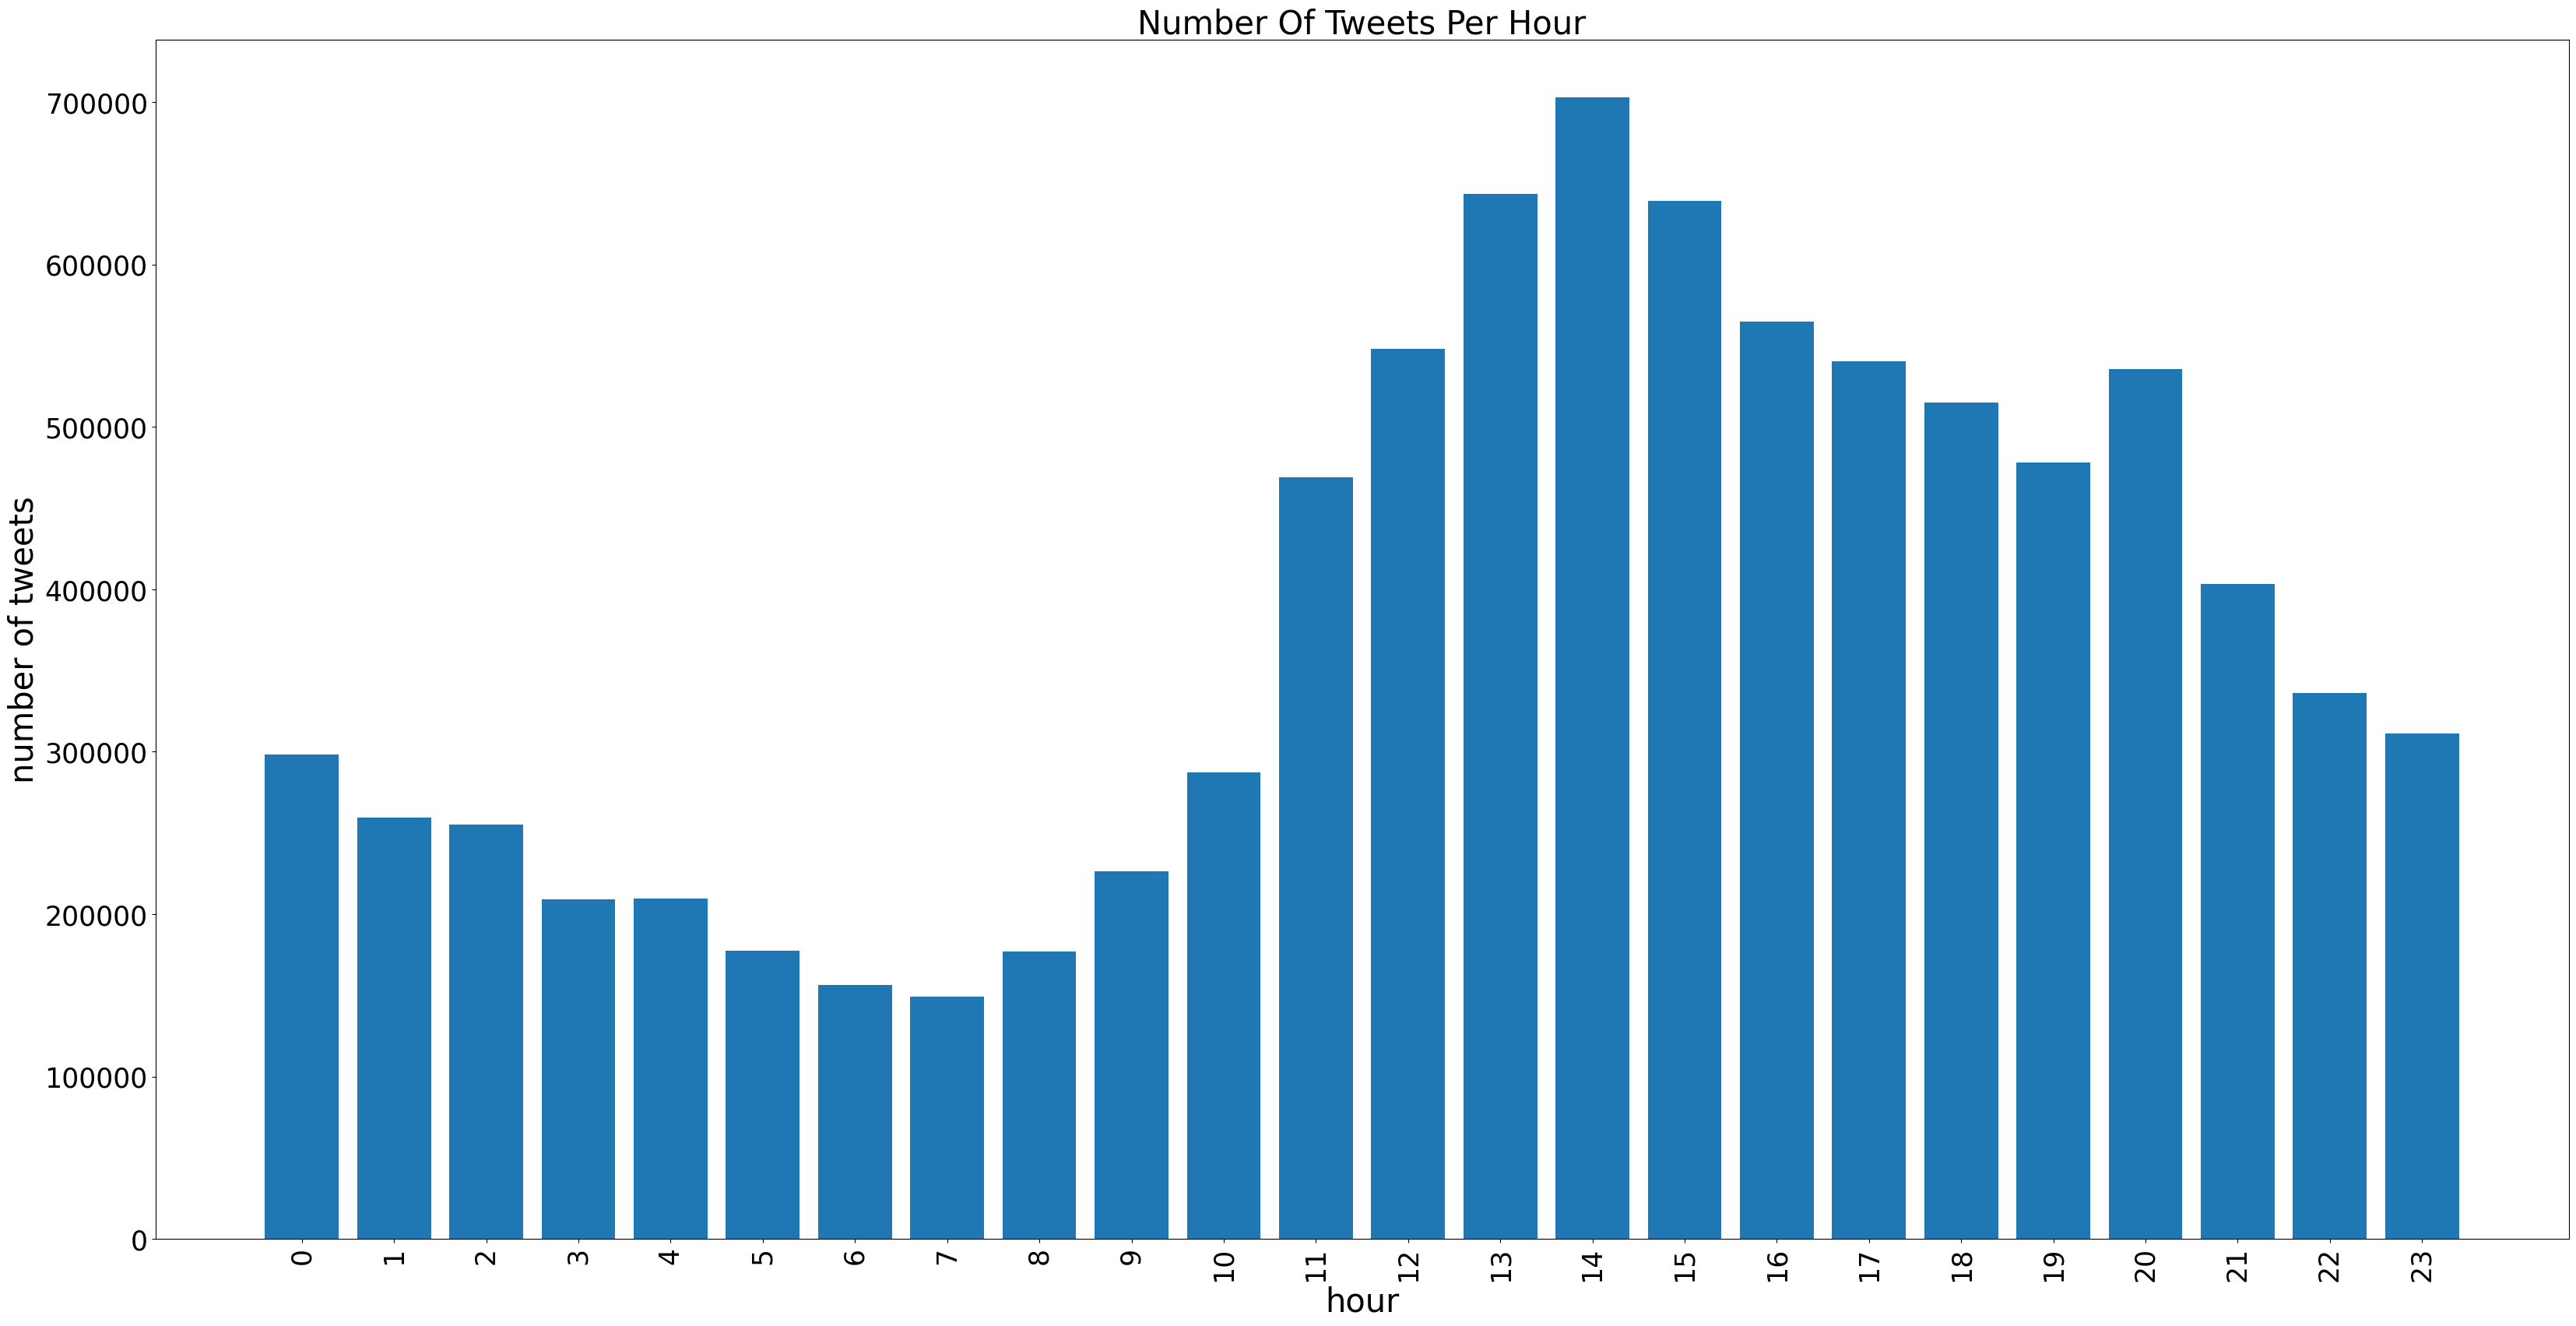

In [194]:
fig_5 , ax_5 = plt.subplots(figsize = (40,20))
plt.bar(hours , all_hour )
plt.xticks(hours , rotation = 'vertical' , fontsize = 25)
plt.xlabel("hour" , fontsize = 30)
plt.ylabel("number of tweets" , fontsize = 30)
plt.yticks(fontsize = 25 )
plt.title("Number Of Tweets Per Hour" , fontsize = 30)
plt.show()

In [199]:
week_day_all = tweets.groupby(by=['week_day']).count()['tweet_id']
week_days = list(week_day_all.keys())
number_per_week_day = list(week_day_all.values)

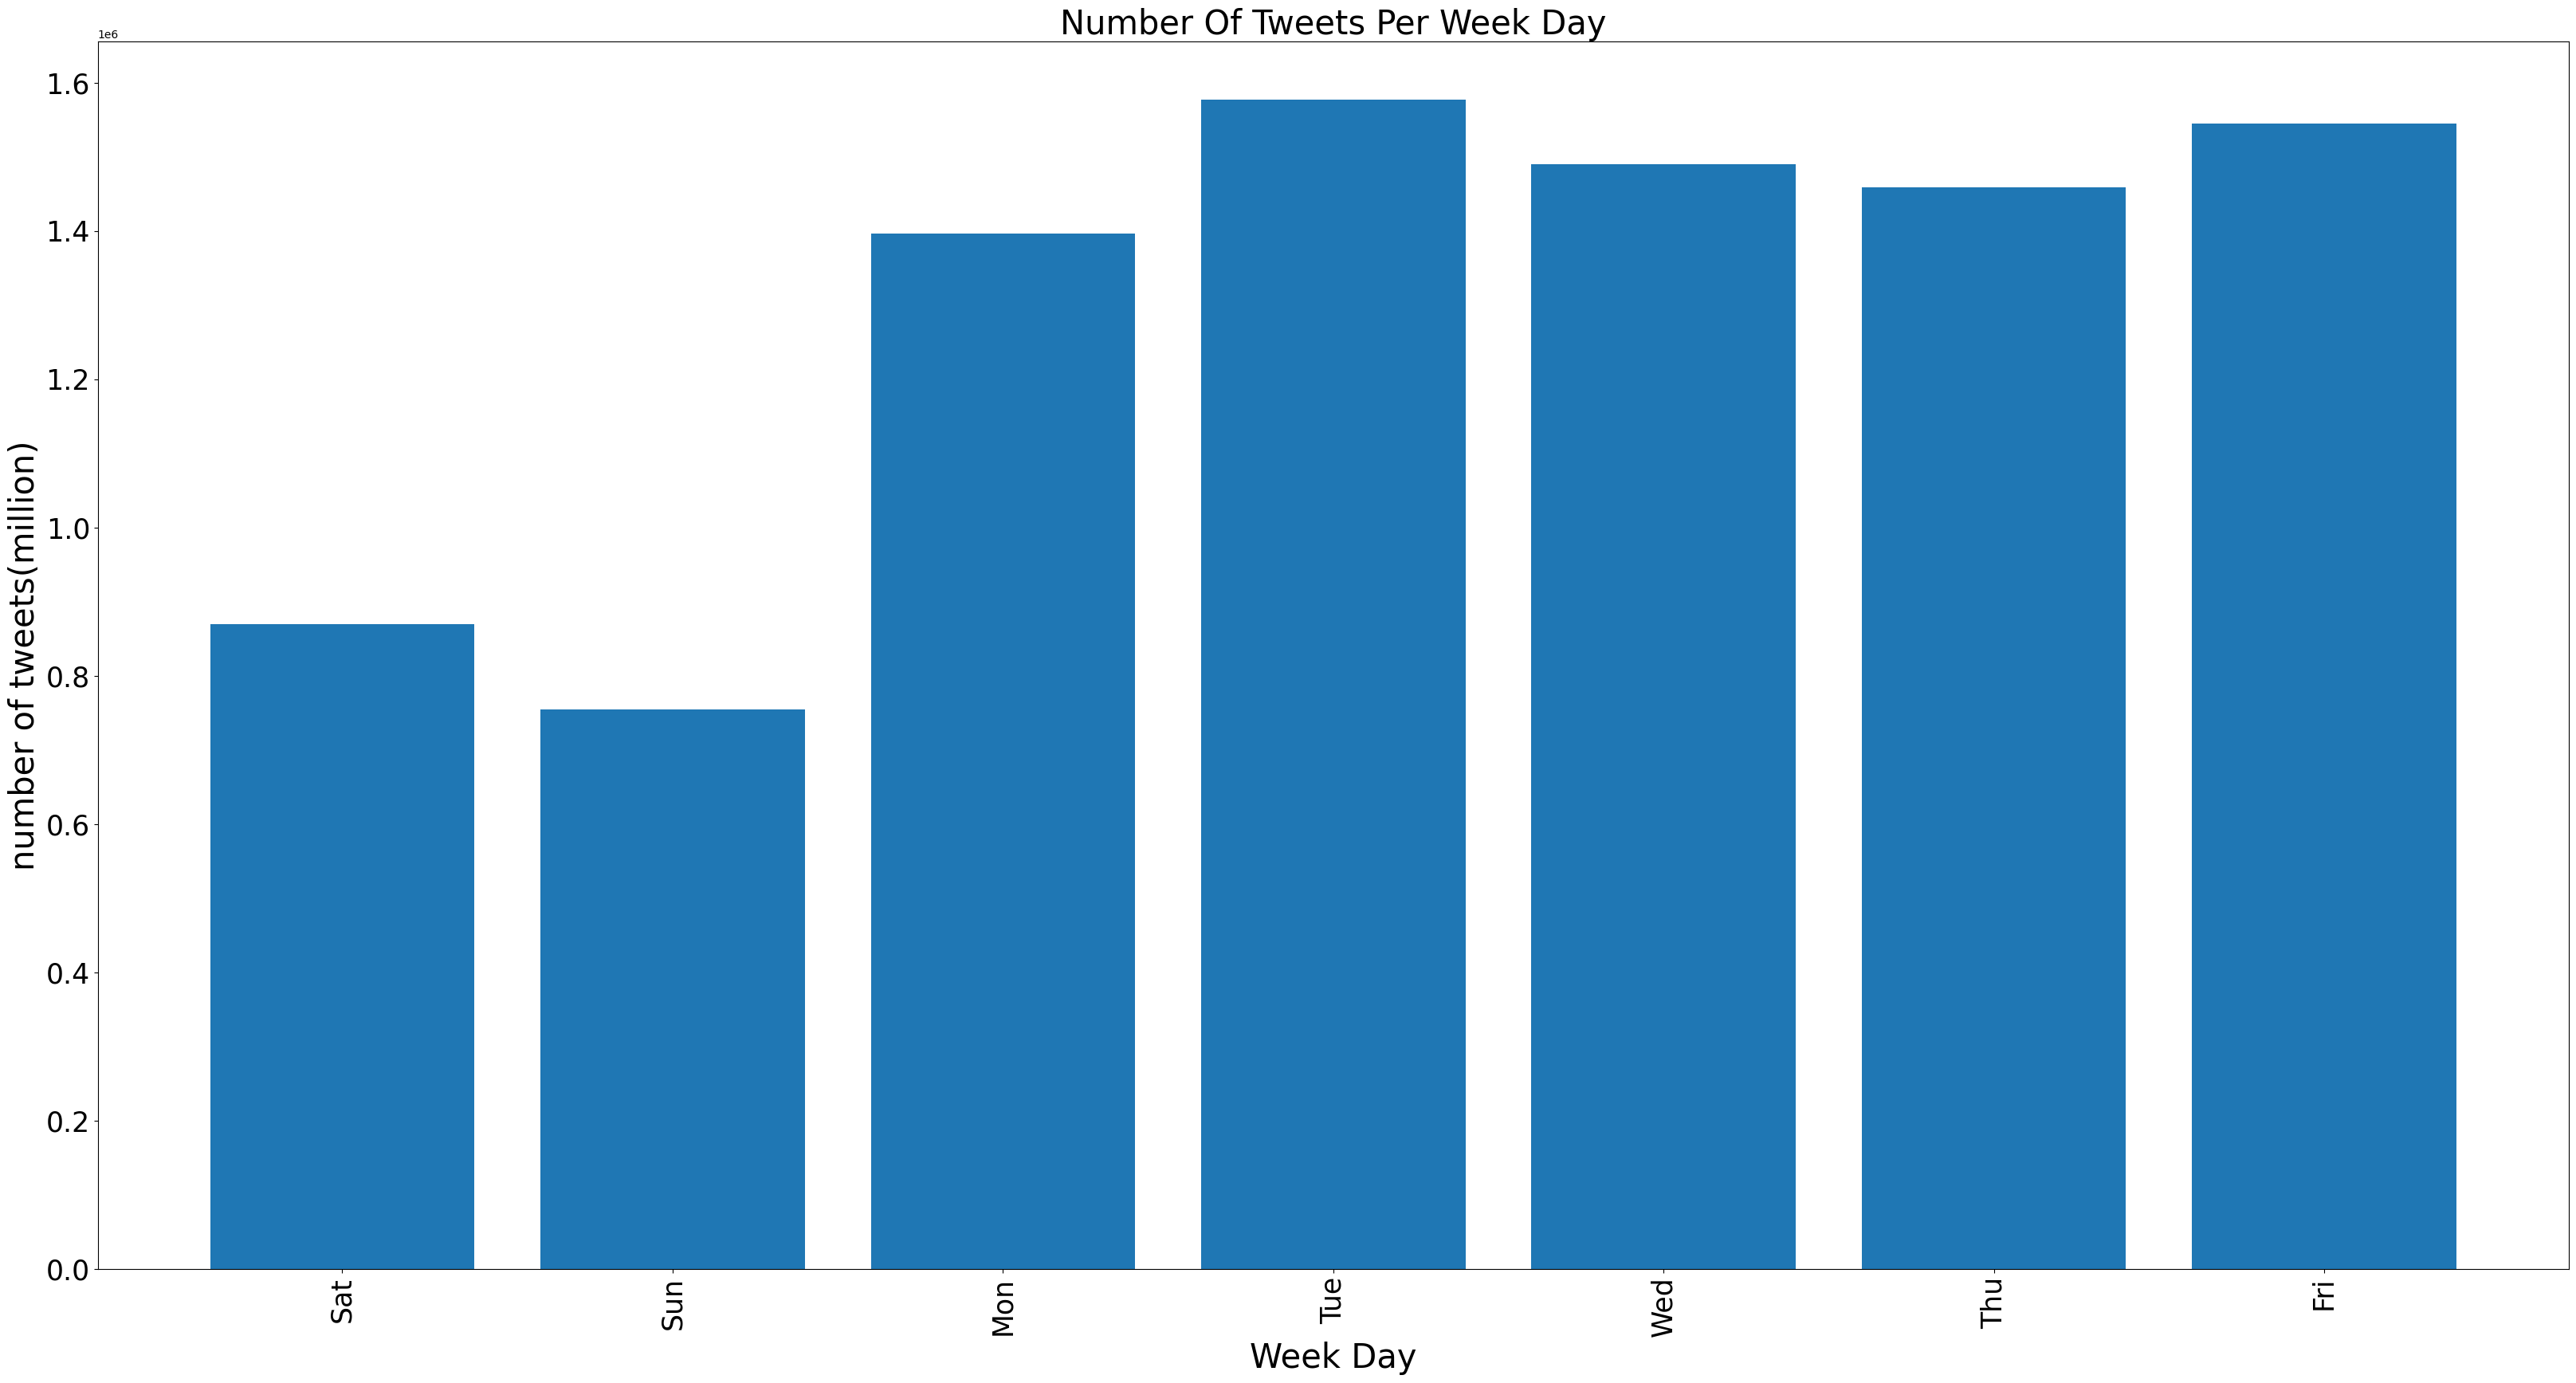

In [203]:
def get_week_day_inv(x) : 
    res = []
    inv_week = {1:'Sat' , 2:'Sun' , 3:'Mon' , 4:'Tue' , 5:'Wed' , 6:'Thu' , 7:'Fri' }
    for i in range(len(x)) : 
        res.append(inv_week[x[i]])
    return res
week_days = get_week_day_inv(week_days)
fig_6 , ax_6 = plt.subplots(figsize = (40,20))
plt.bar(week_days , number_per_week_day )
plt.xticks(week_days , rotation = 'vertical' , fontsize = 25)
plt.xlabel("Week Day" , fontsize = 30)
plt.ylabel("number of tweets(million)" , fontsize = 30)
plt.yticks(fontsize = 25 )
plt.title("Number Of Tweets Per Week Day" , fontsize = 30)
plt.show()

In [204]:
import seaborn as sns

In [207]:
week_hour_all = tweets.groupby(by=['week_day' , 'hour']).count()['tweet_id']
week_hour = list(week_hour_all.keys())
number_week_hour = list(week_hour_all.values)

In [230]:
#sns.heatmap(week_hour_all)
ress = {}
week_dd = [ 'Saturday' , 'Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday'] 
for i in range(24) : 
    ress[i] = {}
    for j in range(1,len(week_dd)+1) : 
        ress[i][week_dd[j-1]] = week_hour_all[j,i]
week_hour_df = pd.DataFrame(ress)

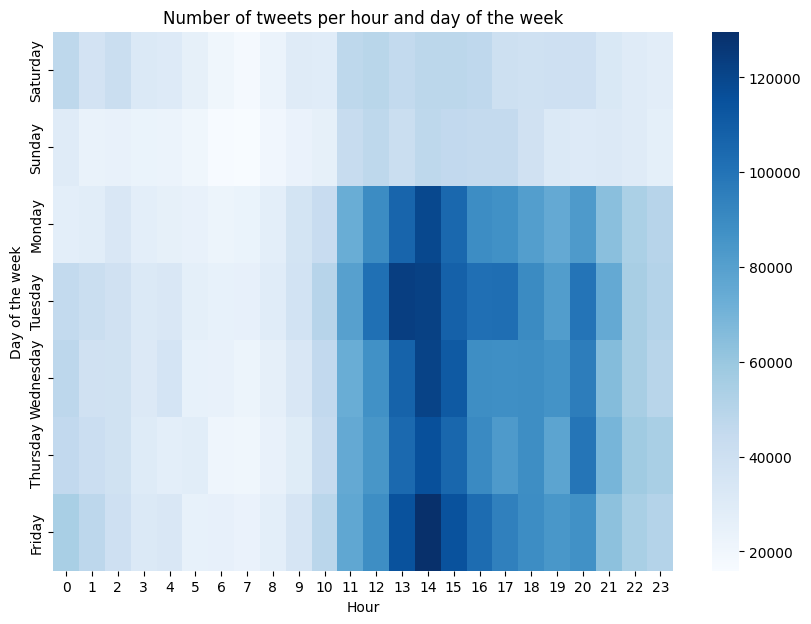

In [232]:
fig_7 , ax_7 = plt.subplots(figsize= (10,7))
sns.heatmap(week_hour_df , cmap = "Blues")
plt.title("Number of tweets per hour and day of the week")
plt.xlabel("Hour")
plt.ylabel("Day of the week")
plt.show()

In [235]:
tweets[tweets['retweeted_status_id'] != 0 ]

,tweet_id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,year,month,day,hour,week_day
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017,2017,5,18,22,6
7,865326138205368320,RT @djdsk3000: $ltc it's about that time #LTC,859451814940336128,0,0,865322401357279232,2828082991,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:02 +0000 2017,2017,5,18,22,6
11,865326150205284353,RT @bapao83: Enough said $ltc https://t.co/dnE...,859451814940336128,0,0,865322296189308954,2242964546,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:05 +0000 2017,2017,5,18,22,6
13,865326157968834563,RT @AceCrypto: $LTC ????!!!!!!,859451814940336128,0,0,865321664124530690,860456169189638144,und,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:07 +0000 2017,2017,5,18,22,6
14,865326159549968389,"RT @whotrades: Why Ascena Retail Group, Arcos ...",780527807419998208,0,0,865325921288564737,164624616,en,"<a href=""http://www.github.com/lashgar"" rel=""n...",Thu May 18 22:00:08 +0000 2017,2017,5,18,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091492,907725316436758528,RT @theflynews: Micron upgraded to Buy from Ne...,43549084,0,0,907723506636398592,166597717,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Sep 12 21:59:14 +0000 2017,2017,9,12,21,4
9091507,907725347130572800,RT @gkariopp: . $MU Citigroup Inc. Reaffirms ...,43549084,0,0,907723527314448384,3399893895,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Sep 12 21:59:22 +0000 2017,2017,9,12,21,4
9091517,907725416349224960,RT @turco_hernan: $PGR #PGR ???? https://t.co/...,889664180692942849,0,0,907724084871655424,1291158379,und,"<a href=""http://twitter.com/download/android"" ...",Tue Sep 12 21:59:38 +0000 2017,2017,9,12,21,4
9091519,907725420417740800,RT @Franke247: Currently $DGB can handle massi...,3049307231,0,0,907671195495092224,1456866636,en,"<a href=""http://twitter.com/download/iphone"" r...",Tue Sep 12 21:59:39 +0000 2017,2017,9,12,21,4


In [242]:
retwe = tweets['retweeted_status_id'].value_counts()[1:]
retweets = list(retwe.keys())
number_retweets = list(retwe.values)

In [246]:

retweet_df

,tweet_id,number_retweets
0,885933344487342082,16809
1,894917375656701952,11158
2,886306485332058112,7004
3,879676871943888896,6916
4,899978268773937152,6842
...,...,...
456983,266945633003393024,1
456984,884500111996444673,1
456985,884507886369550338,1
456986,884515710151557121,1


In [331]:
key_ret_mean = []
ret_mean = []
for i in range(len(stocks_5)) : 
    retweet_df = pd.DataFrame({'tweet_id':retweets , 'number_retweets':number_retweets})
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc ]['ticker'].values[0]
    msk_comp = (entities['text'] == cc) | (entities['text'] == tt )
    selected_entities = pd.merge(entities[msk_comp] , tweets , on = 'tweet_id' , how = 'inner')
    retweet_df = pd.merge(retweet_df  , selected_entities, on='tweet_id'  , how = 'inner')
    rr = retweet_df.groupby(by=['year' , 'month' , 'day']).sum()['number_retweets']
    aa = selected_entities.groupby(by=['year' , 'month' , 'day']).count()['tweet_id']
    key_ret_mean.append(get_date(list(rr.keys())))
    ret_mean.append(np.array(rr.values)/np.array(aa.values))

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


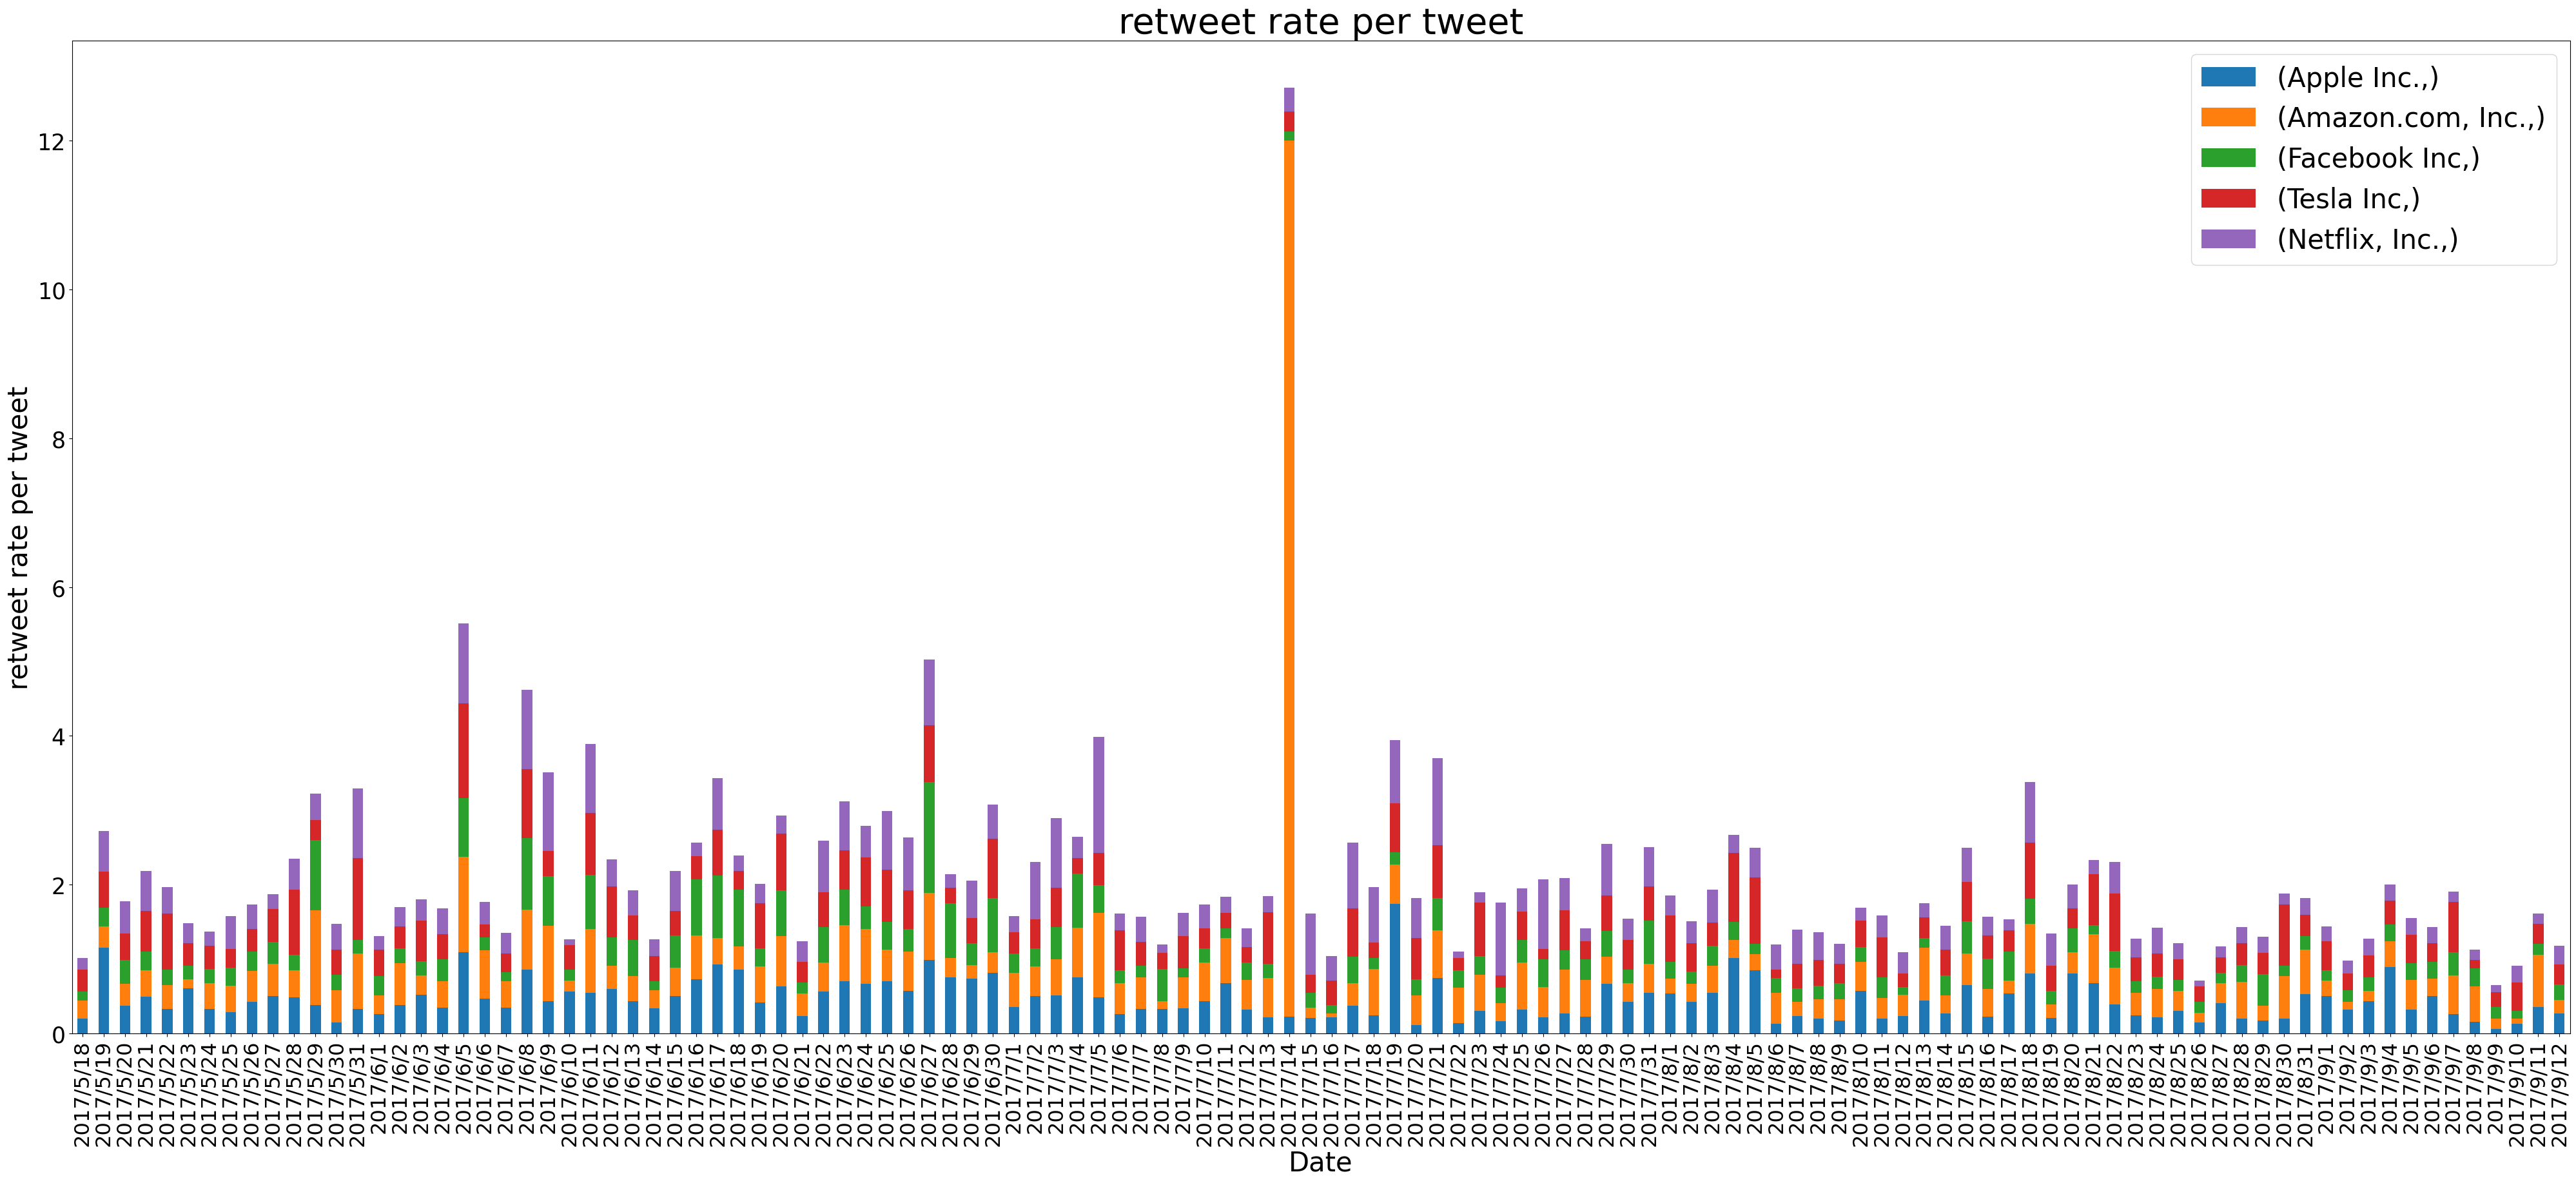

In [332]:
stocks_5 = ['Apple Inc.' , 'Amazon.com, Inc.' , 'Facebook Inc' , 'Tesla Inc' , 'Netflix, Inc.']
df_stock_5_ret = pd.DataFrame(index= key_ret_mean[0] , data = np.array(ret_mean).T , columns=[stocks_5])
df_stock_5_ret
fig_9 , ax_9 = plt.subplots(figsize = (50,20))
df_stock_5_ret.plot.bar( stacked= True  , rot = 90 , ax = ax_9)
plt.xlabel("Date" , fontsize = 30)
plt.ylabel("retweet rate per tweet" , fontsize = 30)
plt.xticks(fontsize = 23)
plt.yticks(fontsize=25)
plt.legend(fontsize = 30)
plt.title("retweet rate per tweet" , fontsize = 40)
plt.show()
# ax_9

In [328]:
key_ret_hour = []
ret_hour = []
for i in range(len(stocks_5)) : 
    retweet_df = pd.DataFrame({'tweet_id':retweets , 'number_retweets':number_retweets})
    cc = stocks_5[i]
    tt = companies[companies['name'] == cc ]['ticker'].values[0]
    msk_comp = (entities['text'] == cc) | (entities['text'] == tt )
    selected_entities = pd.merge(entities[msk_comp] , tweets , on = 'tweet_id' , how = 'inner')
    retweet_df = pd.merge(retweet_df  , selected_entities, on='tweet_id'  , how = 'inner')
    rr = retweet_df.groupby(by=['hour']).sum()['number_retweets']
    aa = selected_entities.groupby(by=['hour']).count()['tweet_id']
    key_ret_hour.append(list(rr.keys()))
    ret_hour.append(np.array(rr.values) / np.array(aa.values))

C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\Rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:343: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


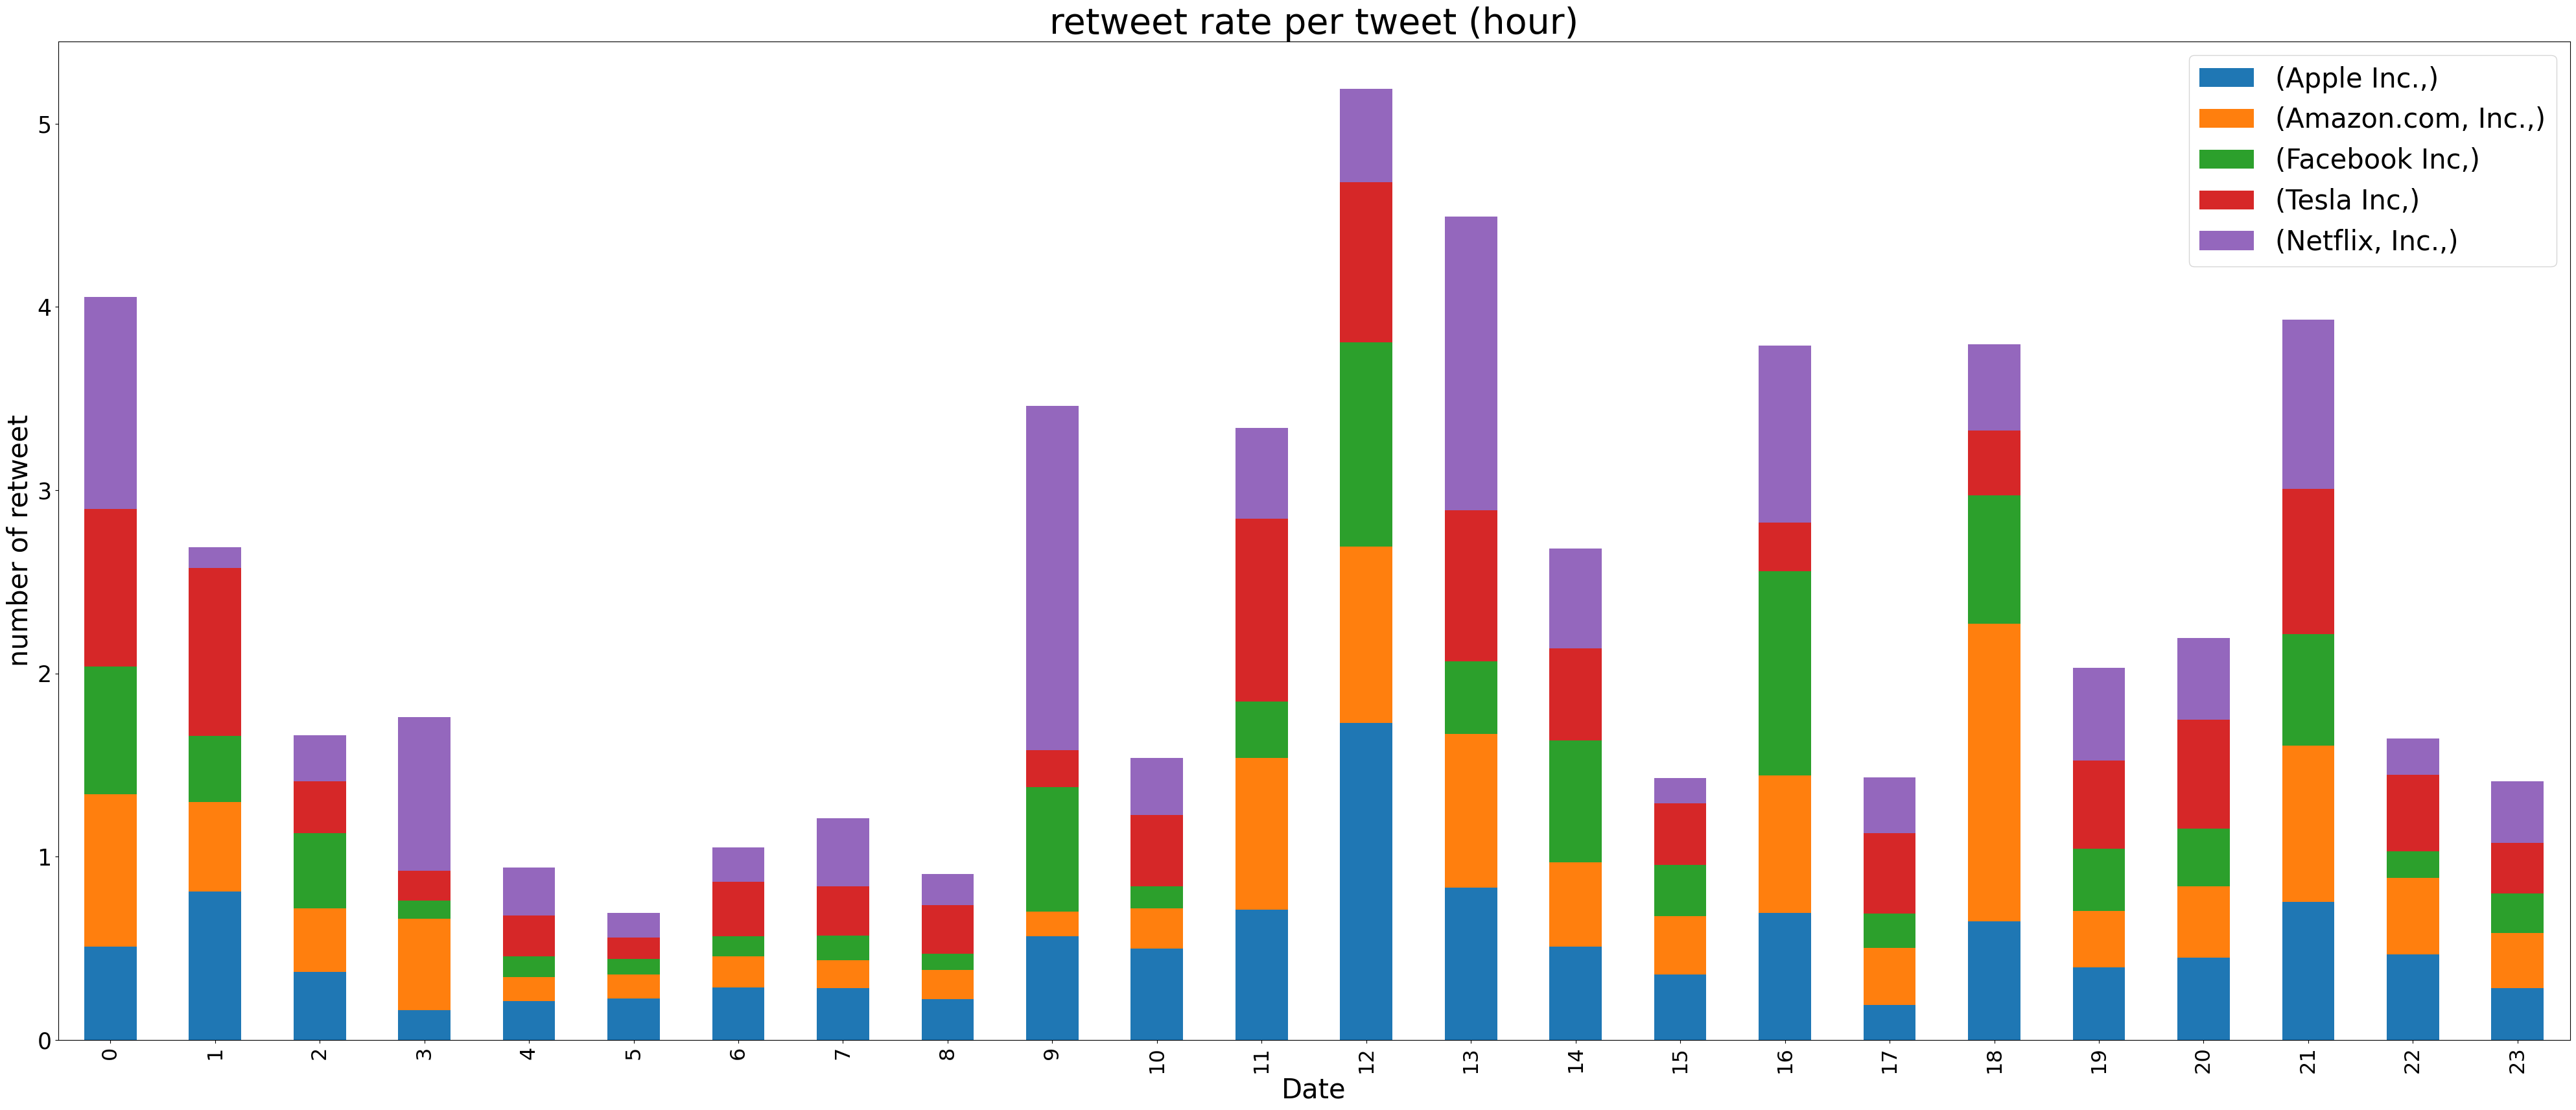

In [329]:
df_ret_hour = pd.DataFrame(index= key_ret_hour[0] , data = np.array(ret_hour).T , columns=[stocks_5])
df_ret_hour
fig_10 , ax_10 = plt.subplots(figsize = (50,20))
df_ret_hour.plot.bar( stacked= True  , rot = 90 , ax = ax_10)
plt.xlabel("Date" , fontsize = 30)
plt.ylabel("number of retweet" , fontsize = 30)
plt.xticks(fontsize = 23)
plt.yticks(fontsize=25)
plt.legend(fontsize = 30)
plt.title("retweet rate per tweet (hour)" , fontsize = 40)
plt.show()

In [418]:
# Statistics on most important financial information on individual stocks
# مشخص کردن مارکت مربوط به هر بازار
exs = list(companies['exchange'].value_counts().keys())
ex_data = []
for i in exs : 
    comp_ex = list(companies[companies['exchange'] == i ].dropna(subset = ['capitalization'])['capitalization'].values)
    ex_data.append(comp_ex)

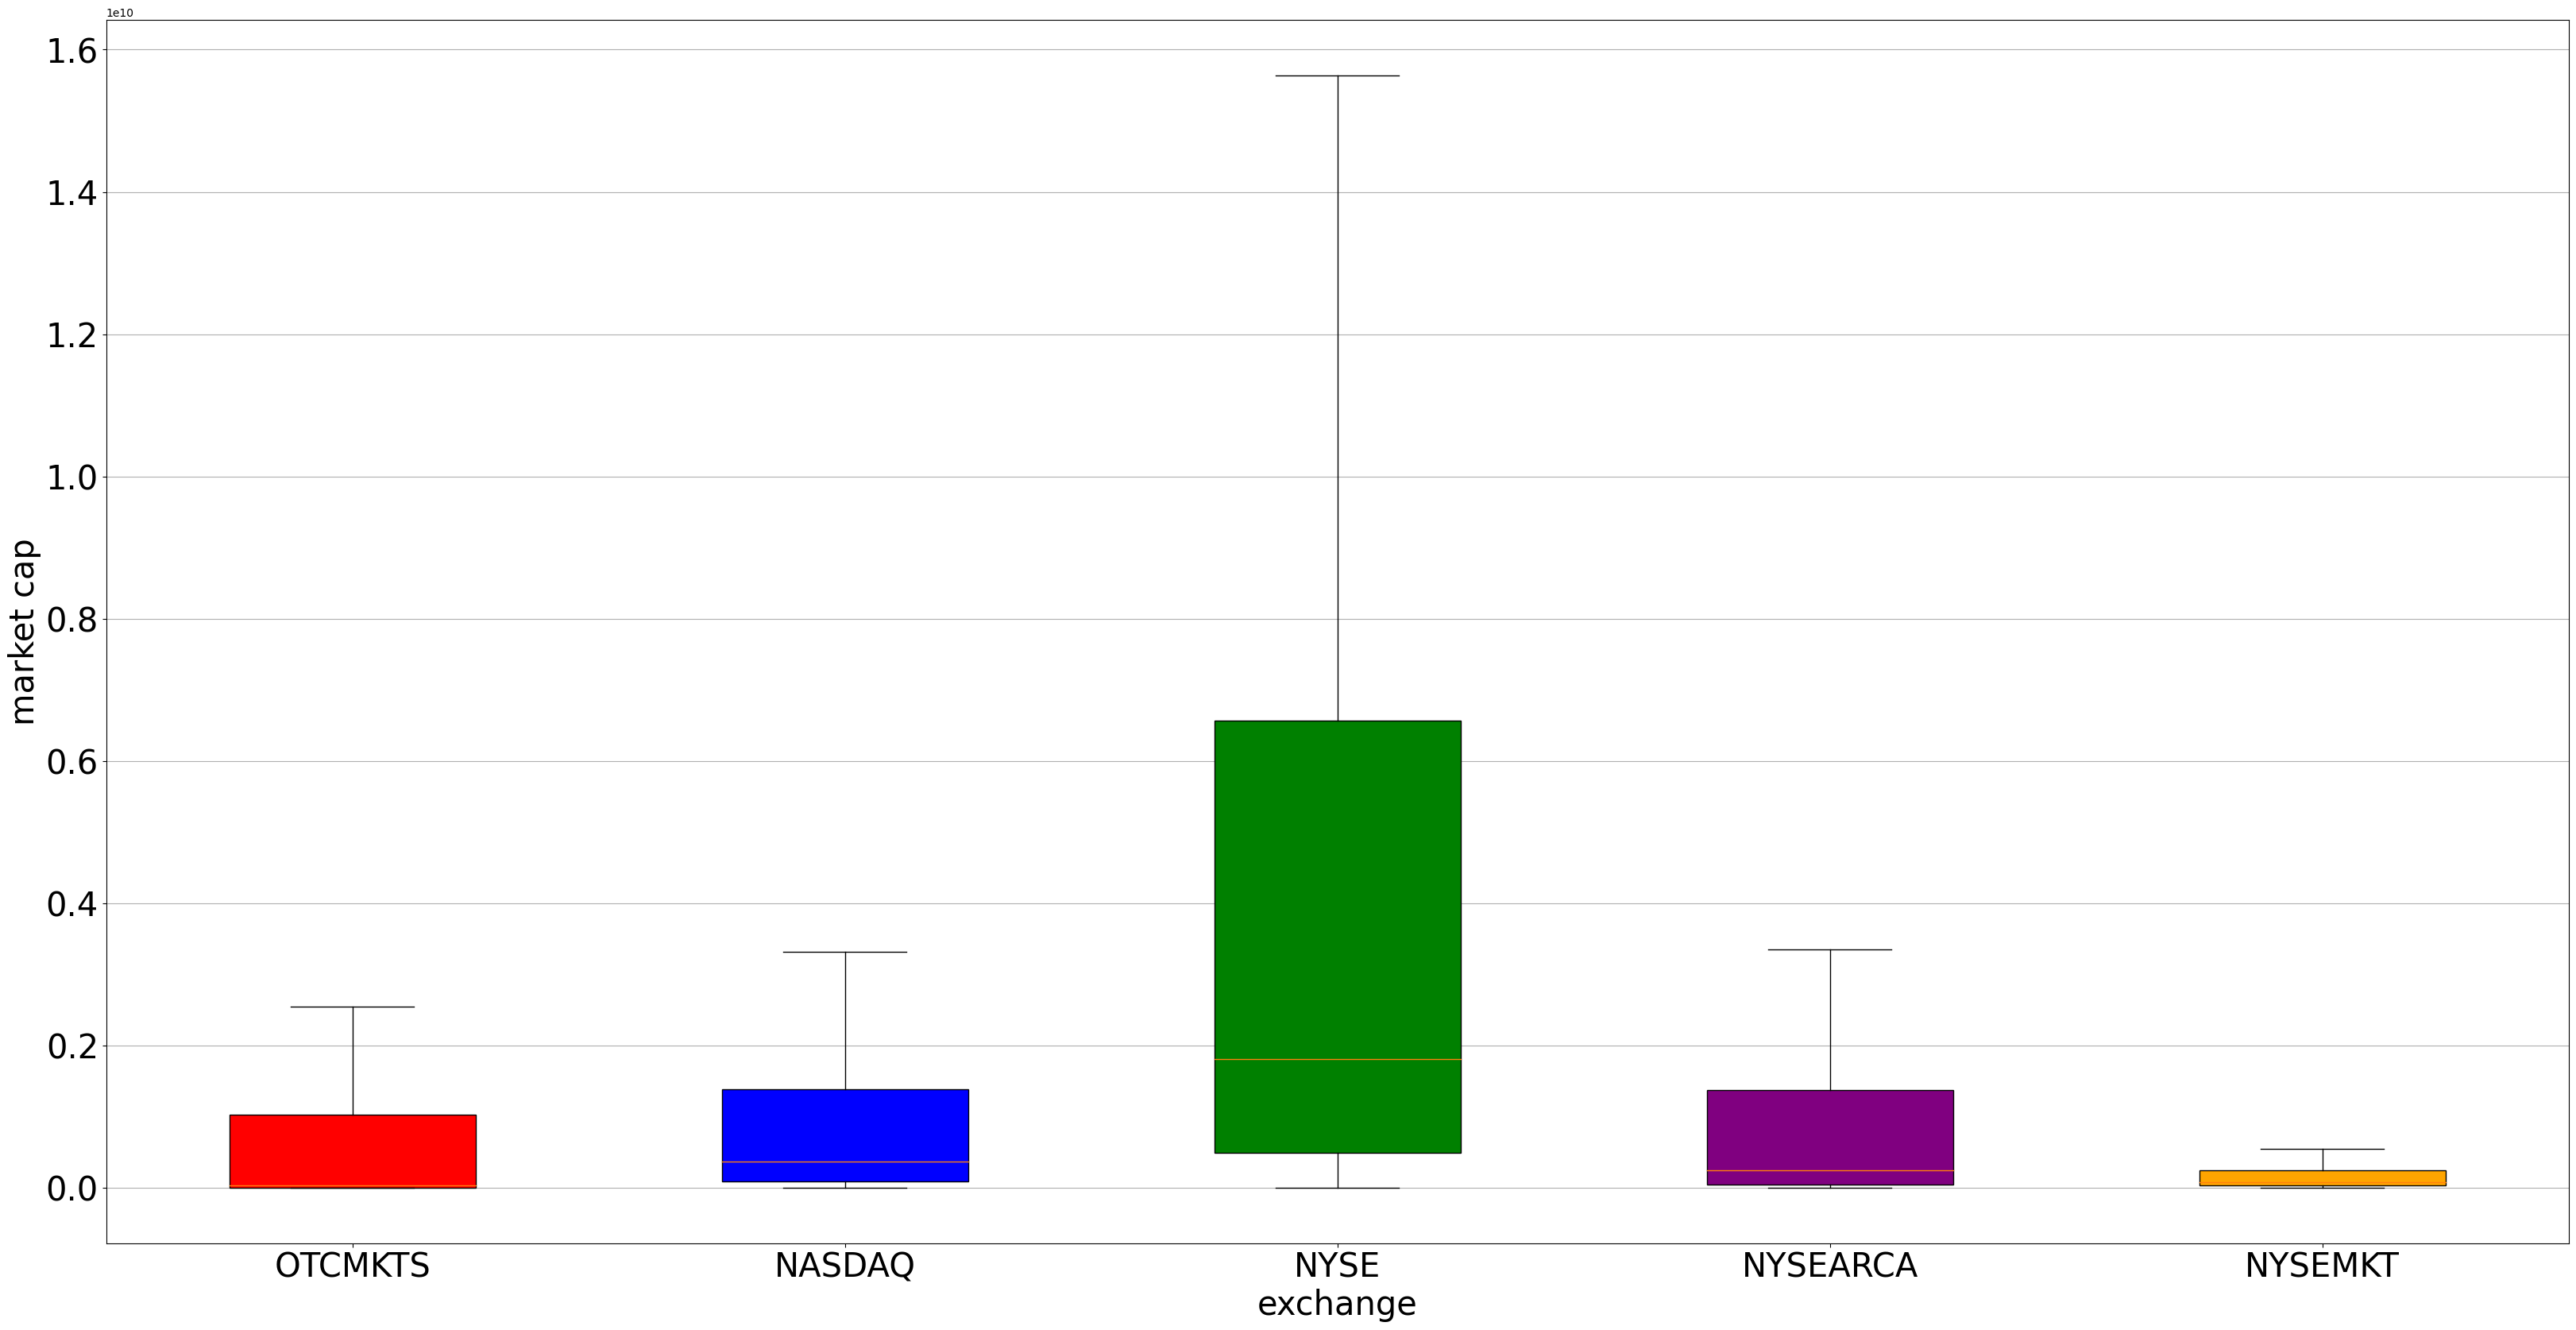

In [426]:
# رسم نمودار جعبه ای بازار ها (دیتاهای پرت حذف شده اند )
fig_11 , ax_11 = plt.subplots(figsize = (40,20))
bplot1 = ax_11.boxplot(ex_data , vert = True , patch_artist= True , labels = exs , showfliers=False)
colors  = ['red' , 'blue' , 'green' , 'purple' , 'orange']
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
ax_11.yaxis.grid(True)
plt.xticks( fontsize = 30)
plt.yticks( fontsize = 30)
plt.xlabel("exchange" , fontsize = 30)
plt.ylabel("market cap" , fontsize = 30)
plt.show()

In [427]:
# مشخص کردن ماکزیمم و مینیمم هر بازار
for i in range(len(exs)) : 
    print(f"exchange : {exs[i]} , max cap stock : {max(ex_data[i])} , min cap stock : {min(ex_data[i])}")

exchange : OTCMKTS , max cap stock : 341680000000.0 , min cap stock : 0.0
exchange : NASDAQ , max cap stock : 748550000000.0 , min cap stock : 35000.0
exchange : NYSE , max cap stock : 430230000000.0 , min cap stock : 10.0
exchange : NYSEARCA , max cap stock : 234130000000.0 , min cap stock : 144500.0
exchange : NYSEMKT , max cap stock : 123980000000.0 , min cap stock : 12.0


array([0.16301729, 0.2456364 ])